# 1.Loading Various Packages and Data

In [2]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#packages
import pandas_ml as pdml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sb
from collections import Counter
from IPython.core.display import Image
import scipy.stats as stats

#fix imbalanced dataset
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

#analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

from sklearn.cross_validation import train_test_split

C:\Users\chris\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [3]:
df = pd.read_stata('C:/Users/chris/Desktop/ECON-628-01-ckbamona/Datasets/lending/loan.dta')

# 2.Data Cleaning

In [4]:
#Print first row
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
#Identify and Drop rows with duplicates values, if any
#The command below returns a pandas Series
df.duplicated()
#Then the next code removes duplicate records and returns a DataFrame without duplicates.
df.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.000000,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.000000,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.000000,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.000000,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.000000,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441.0,5000.0,5000.0,5000.000000,36 months,0.0790,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742.0,7000.0,7000.0,7000.000000,60 months,0.1596,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686.0,3000.0,3000.0,3000.000000,36 months,0.1864,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957.0,5600.0,5600.0,5600.000000,60 months,0.2128,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721.0,5375.0,5375.0,5350.000000,60 months,0.1269,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [28]:
## How many rows and columns does the dataset have
df.shape

(42542, 111)

In [4]:
#We have 111 variables but we are creating a new dataframe with the variables essential to our analysis

df1 = df[['id','member_id','purpose','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status','addr_state']]

In [93]:
#Variable types
df1.dtypes

id                      object
member_id              float64
purpose                 object
loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
verification_status     object
loan_status             object
addr_state              object
dtype: object

In [94]:
#Let's see if I have a balanced panel dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42542 entries, 0 to 42541
Data columns (total 19 columns):
id                     42542 non-null object
member_id              42535 non-null float64
purpose                42542 non-null object
loan_amnt              42535 non-null float64
funded_amnt            42535 non-null float64
funded_amnt_inv        42535 non-null float64
term                   42542 non-null object
int_rate               42535 non-null float64
installment            42535 non-null float64
grade                  42542 non-null object
sub_grade              42542 non-null object
emp_title              42542 non-null object
emp_length             42542 non-null object
home_ownership         42542 non-null object
annual_inc             42531 non-null float64
verification_status    42542 non-null object
verification_status    42542 non-null object
loan_status            42542 non-null object
addr_state             42542 non-null object
dtypes: float64(7), object(12

In [324]:
#Clearly, I have a few missing variables
df1.isnull().sum()

id                      0
member_id               7
purpose                 0
loan_amnt               7
funded_amnt             7
funded_amnt_inv         7
term                    0
int_rate                7
installment             7
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc             11
verification_status     0
verification_status     0
loan_status             0
addr_state              0
dtype: int64

In [663]:
#The variables that are missing are essential to our analysis : loan amount, interest rate and annual income
#Therefore we are dropping the rows with missing values
df2 = df1.dropna()

In [661]:
#Check missing values
df1.isnull().sum()

id                      0
member_id               7
purpose                 0
loan_amnt               7
funded_amnt             7
funded_amnt_inv         7
term                    0
int_rate                7
installment             7
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc             11
verification_status     0
verification_status     0
loan_status             0
addr_state              0
dtype: int64

In [664]:
#Transposing the table makes it easier to visualize my summary statistics
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,42531.0,825772.908772,279459.881837,70473.0000,638507.0000,824195.0000,1.033958e+06,1.314167e+06
loan_amnt,42531.0,11090.173050,7411.137529,500.0000,5200.0000,9700.0000,1.500000e+04,3.500000e+04
funded_amnt,42531.0,10822.011004,7147.112309,500.0000,5000.0000,9600.0000,1.500000e+04,3.500000e+04
funded_amnt_inv,42531.0,10140.474470,7131.675571,0.0000,4950.0000,8500.0000,1.400000e+04,3.500000e+04
int_rate,42531.0,0.121654,0.037079,0.0542,0.0963,0.1199,1.472000e-01,2.459000e-01
installment,42531.0,322.634879,208.933353,15.6700,165.5200,277.7100,4.282750e+02,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.0000,40000.0000,59000.0000,8.250000e+04,6.000000e+06


# 3. Exploratory Data Analysis

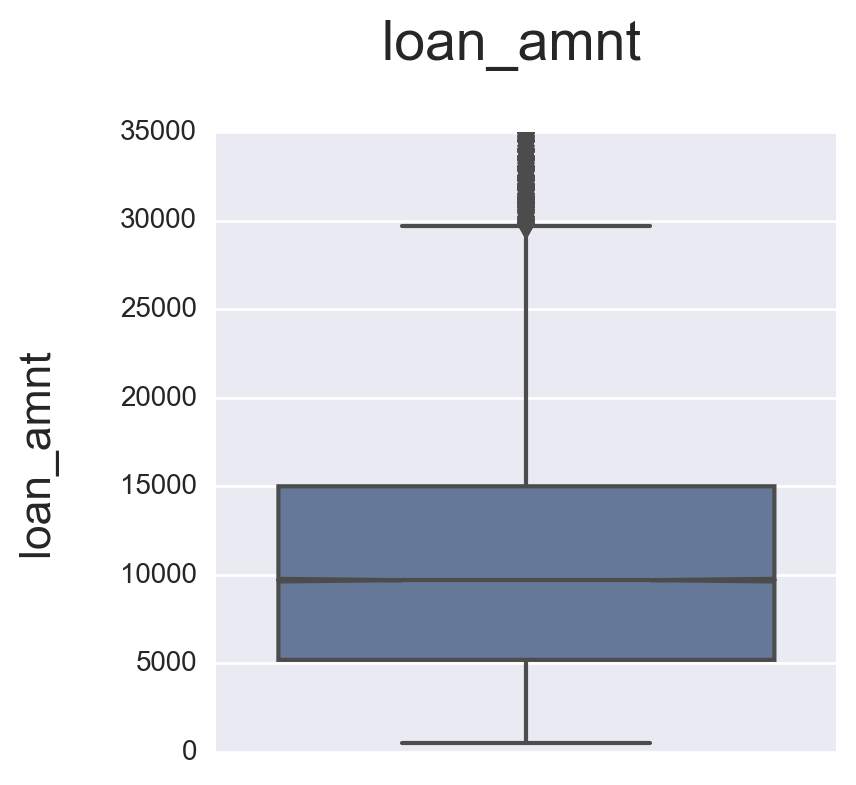

In [15]:
#Outliers (scatterplot)

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(df2.loan_amnt    , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('loan_amnt  \n', fontsize=16)
ax.set_title('loan_amnt  \n', fontsize=20)

plt.show()



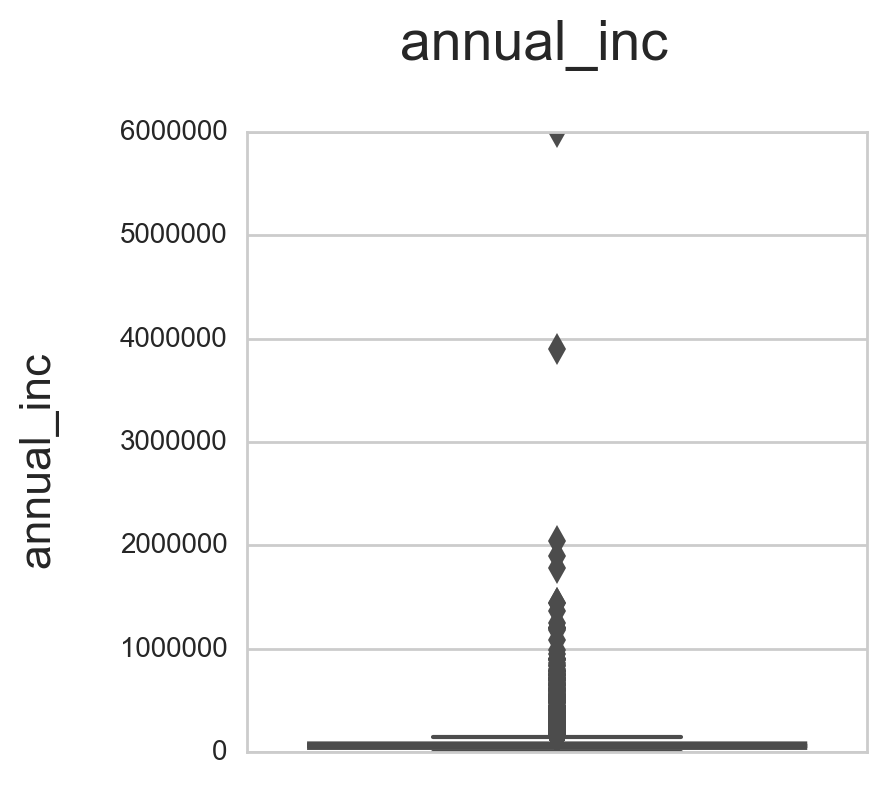

In [40]:
#Outliers (scatterplot)

fig = plt.figure(figsize=(4,4))
ax = fig.gca()

sns.boxplot(df2.annual_inc   , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('annual_inc   \n', fontsize=16)
ax.set_title('annual_inc   \n', fontsize=20)

plt.show()

In [ ]:
#By visualizing this scatterplot, I notice that the annual income variable has a great number of outliers
#Those outliers are between a million dollar and 6 millions dollar, even though the maximum loan granted is only 35,000
#The variable actually represent the income stated on the application form, whether it is verified or not
#For our statistical analysis, we may need to focus on verified income or get rid of these outliers

#More information on the income verification process are available online:
#https://www.lendingclub.com/public/income-verification.action

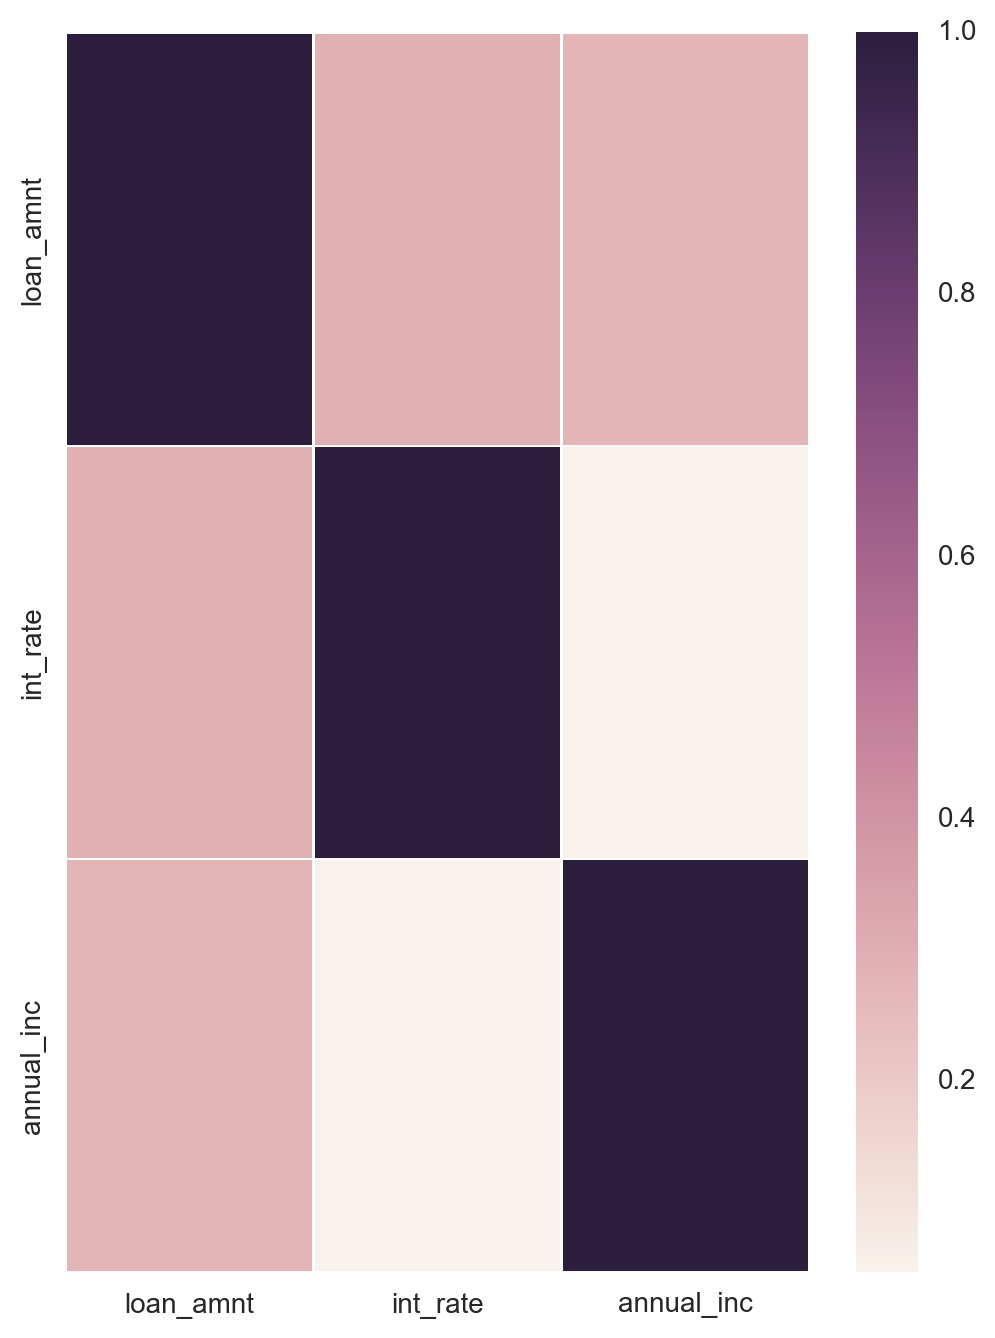

In [91]:
#Let's plot a correlation matrix and add lines between each cell
df_corr=df[['loan_amnt','term','int_rate','emp_length','annual_inc','emp_length']]
fig = plt.figure(figsize=(6,8))
ax = fig.gca()

sns.heatmap(df_corr.corr(), ax=ax, linewidths=.5)

plt.show()

#http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#There is a positive correlation between the loan amount and the annual income
#The association between the loan amount and interest rate is also positive


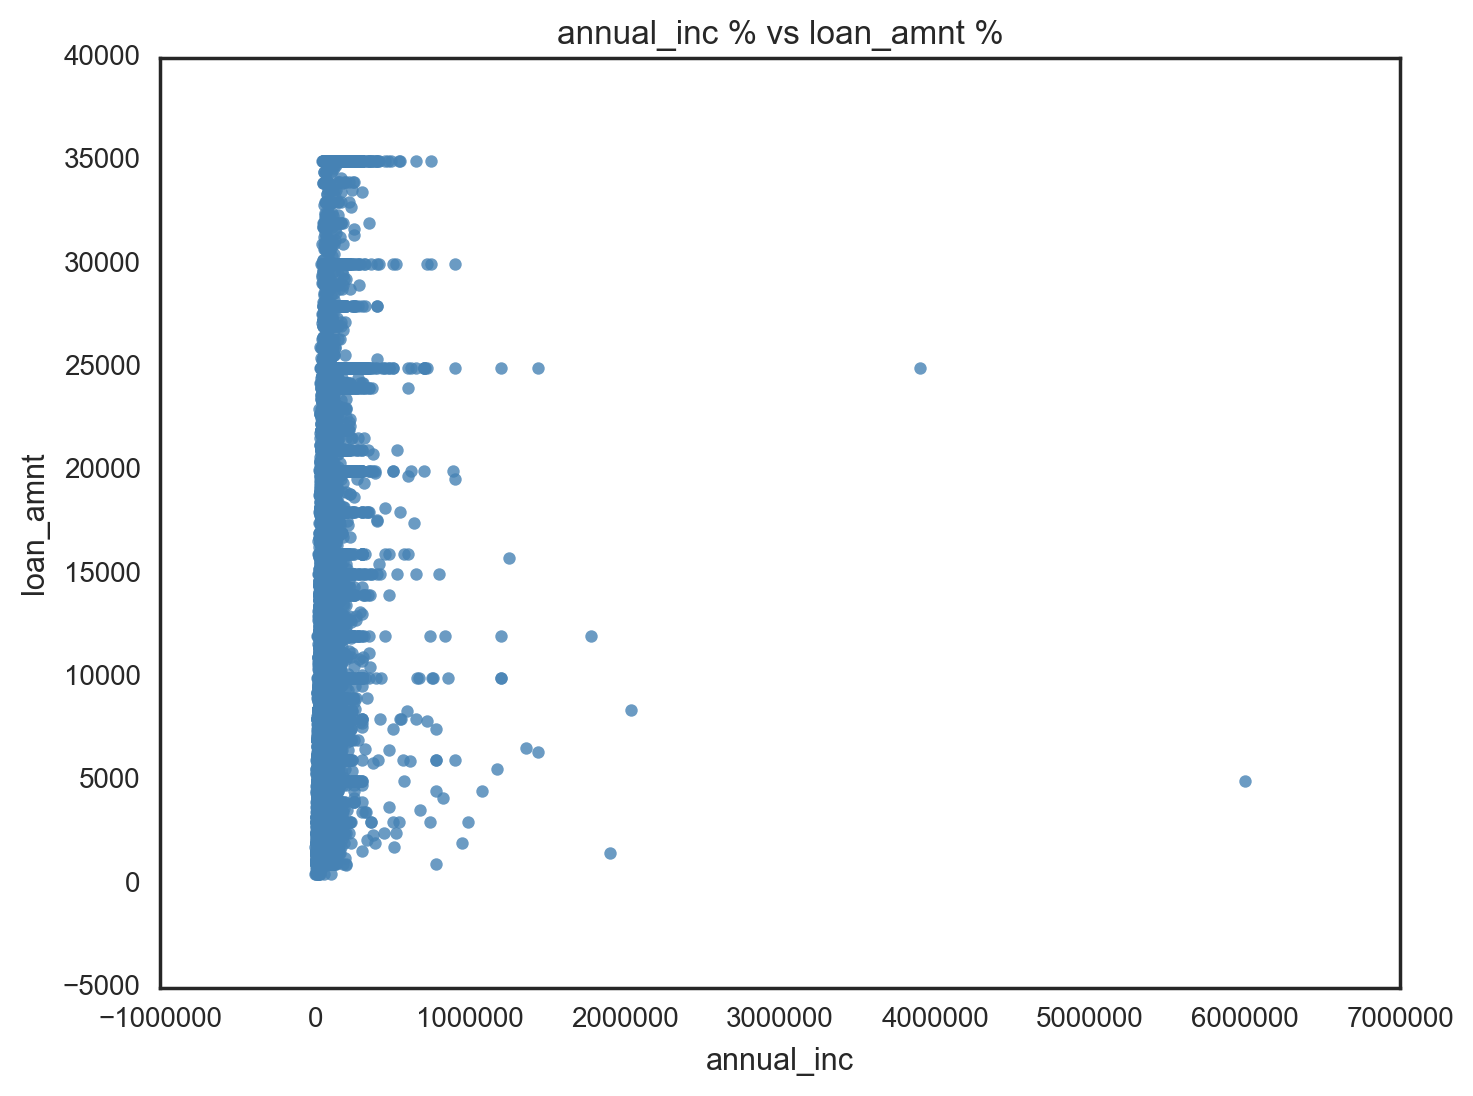

In [74]:
#Scatterplot of correlated variables

#Choose two variables that appear very related 
#Use seaborns regplot to plot a scatter plot between the pairs of variables

annual_inc = df2.annual_inc
loan_amnt = df2.loan_amnt

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(annual_inc,loan_amnt, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('annual_inc % vs loan_amnt %')
plt.show()

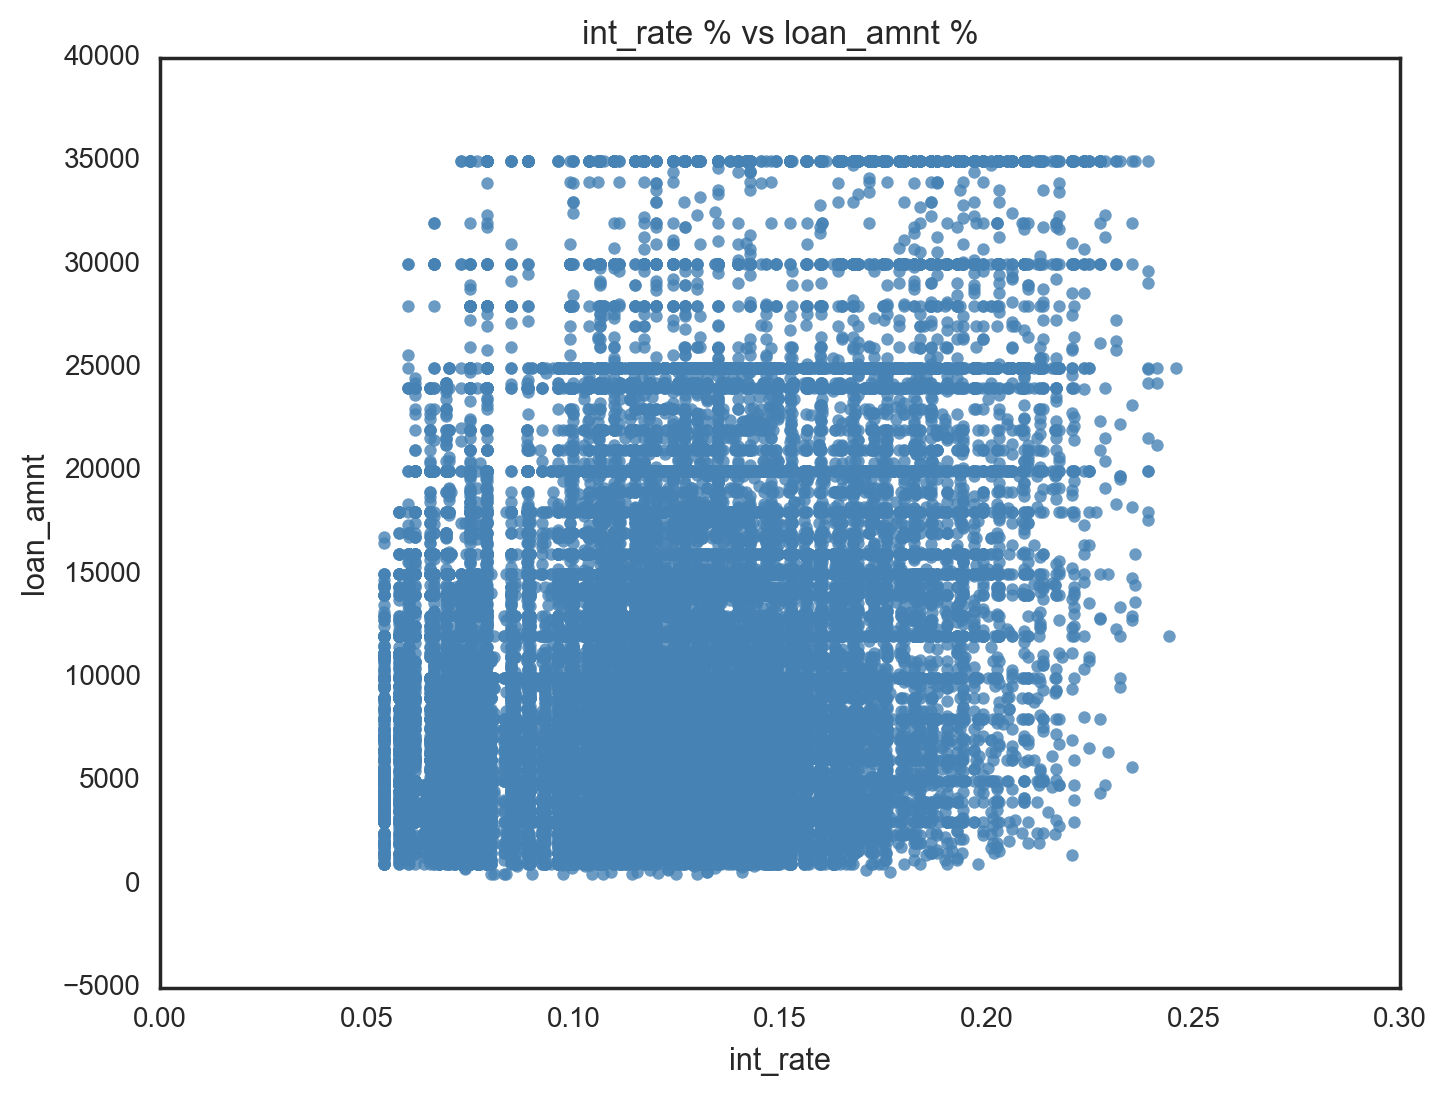

In [75]:
#Scatterplot of correlated variables

#Choose two variables that appear very related 
#Use seaborns regplot to plot a scatter plot between the pairs of variables

int_rate = df2.int_rate
loan_amnt = df2.loan_amnt

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(int_rate,loan_amnt, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('int_rate % vs loan_amnt %')
plt.show()

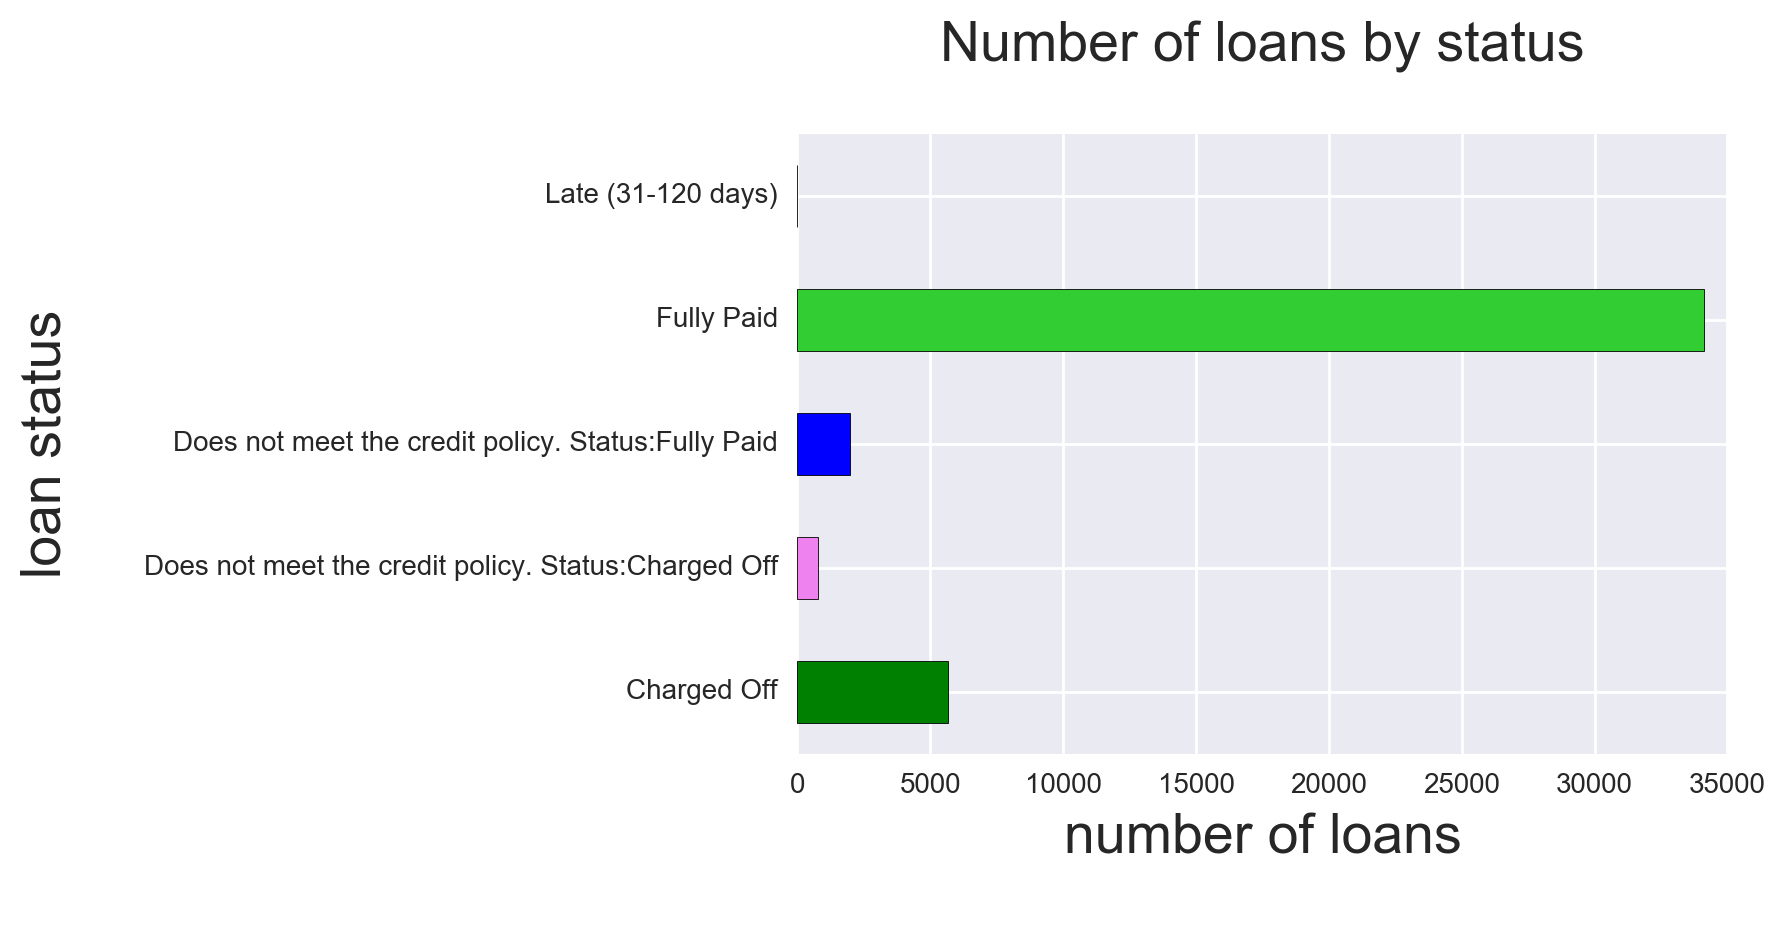

In [28]:
#Graph of loan by status
df2.groupby('loan_status')['id'].count().plot(kind='barh', color=['green', 'violet','blue','limegreen'])
plt.title('Number of loans by status\n', fontsize = 20)
plt.ylabel('loan status\n', fontsize=20)
plt.xlabel('number of loans\n', fontsize=20)
plt.show()


In [ ]:
#When we look at the number of loans and the loan status, it appears that the majority of loans are full paid and just
# a few NUMBER of loans payment are past due

In [137]:
#Then, let's list all the reasons people apply for a loan
df.purpose.unique()
#https://chrisalbon.com/python/pandas_list_unique_values_in_column.html

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', ''], dtype=object)

In [30]:
#We can create broader categories of loan reasons and then plot a graph
def categories(c):
   
    if'credit_card' in c or 'debt_consolidation' in c:
        return 'finance'
    
    elif  'home_improvement' in c or 'house'in c or 'moving'  in c:
        return 'house'
    
    elif 'small_business'  in c:
        return 'small_business'
    
    elif 'wedding'  in c:
        return 'wedding'
    
    elif 'major_purchase' in c:
        return 'major_purchase'
    
    elif 'medical'  in c:
        return 'medical'
    
    elif 'vacation' in c:
        return 'vacation'
    
    elif 'educational' in c:
        return 'education'
    
    elif 'renewable_energy' in c:
        return 'renewable_energy'
    
    elif 'other' in c:
        return 'other'
    
df['broader_categories'] = df['purpose'].apply(categories) 

In [37]:
#Let's see the broader categories of loans that I have created
test= df[df['broader_categories'] == 'house']
test['purpose'].unique()

array(['home_improvement', 'moving', 'house'], dtype=object)

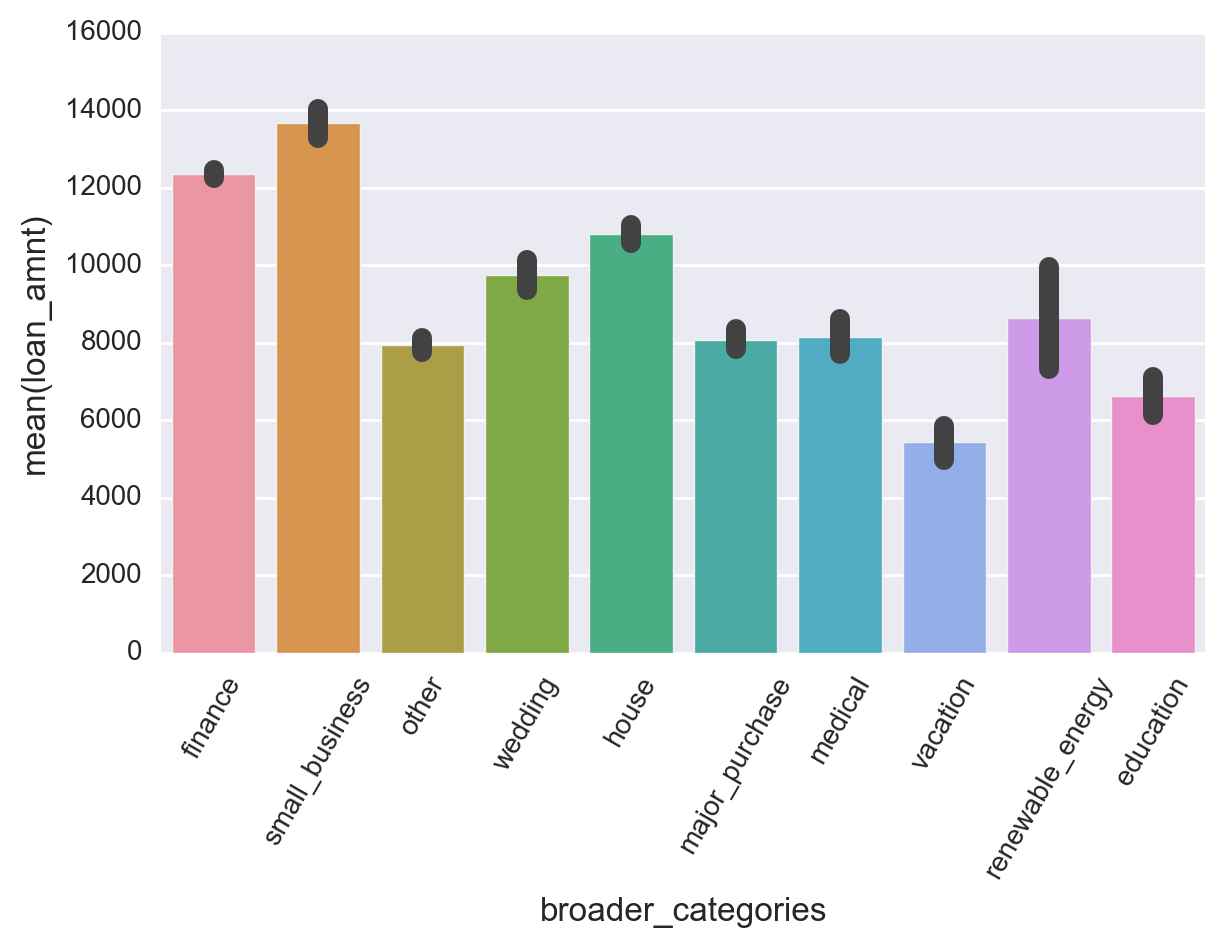

In [245]:
#Now, let's plot a graph
loan_by_purpose = df.groupby('broader_categories', as_index = False).agg({'loan_amnt': 'sum'})
x = df['broader_categories']
y = df['loan_amnt']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()


In [ ]:
#On average, the total amount of loans granted is highest for small businesses, finance and home loans.

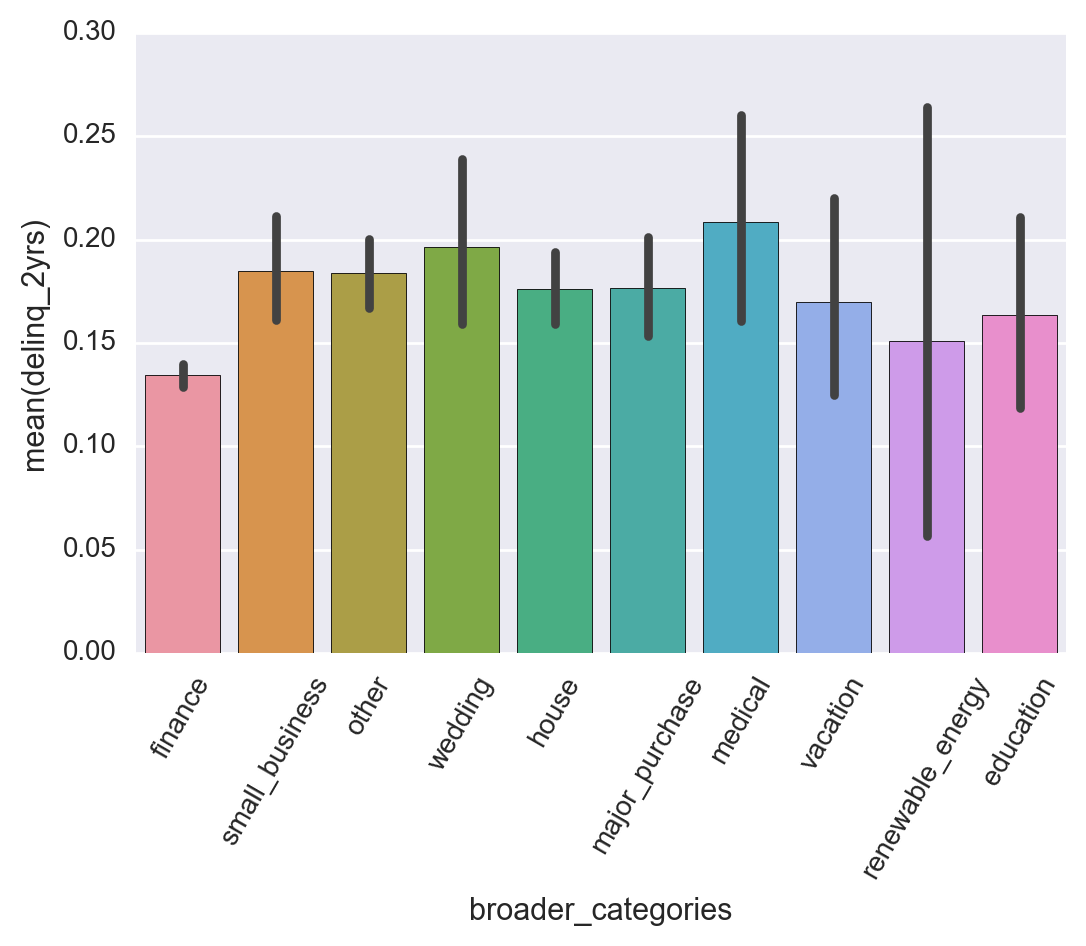

In [41]:
#What types of loans are delinquent?
delinq_status = df.groupby('broader_categories').agg({'delinq_2yrs':'count'})
x = df['broader_categories']
y = df['delinq_2yrs']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#Loans that have been delinquent for the past two years were requested for medical reasons, a wedding,  and by a small business.

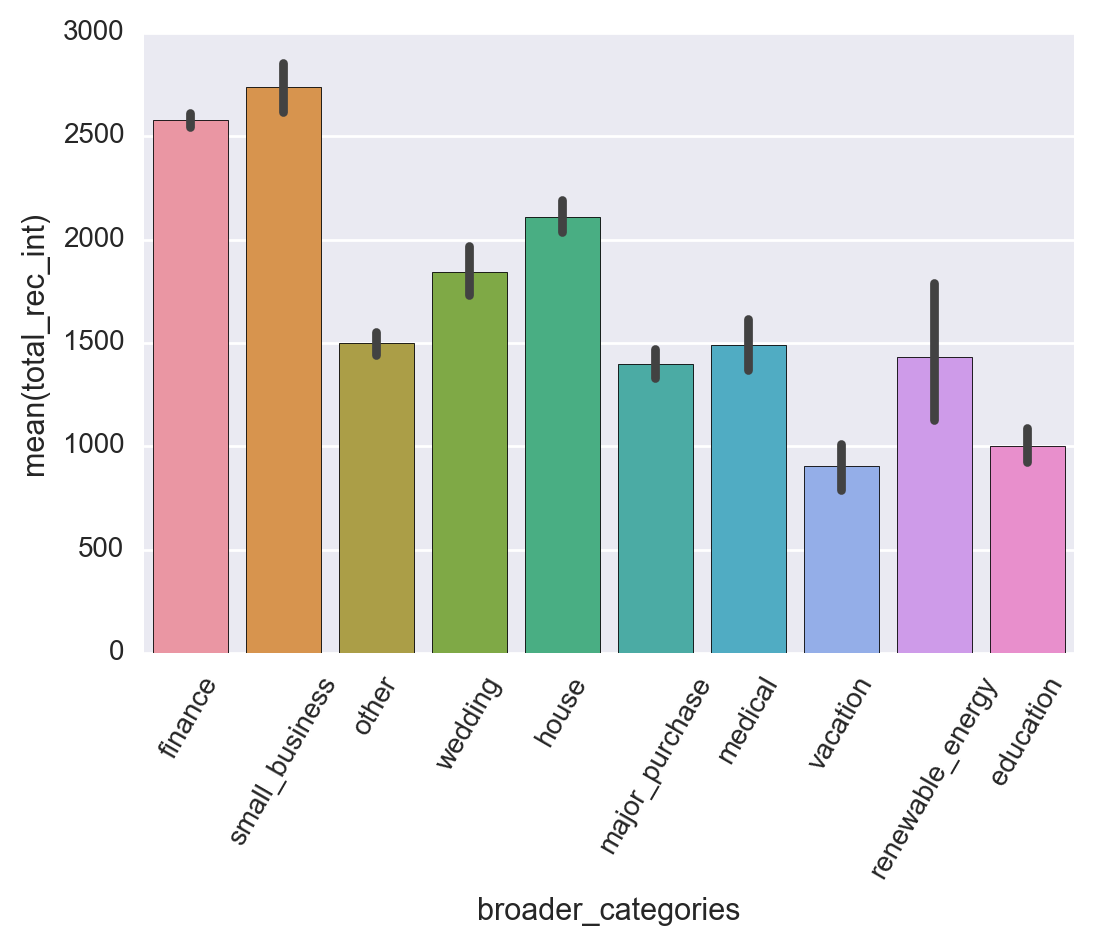

In [43]:
#What types of loans yielded more interest?
int_status = df.groupby('broader_categories').agg({'total_rec_int':'sum'})
x = df['broader_categories']
y = df['total_rec_int']
sns.barplot(x,y)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#The types of loans that yielded more interest are small business loans, finance loans, and home loans.

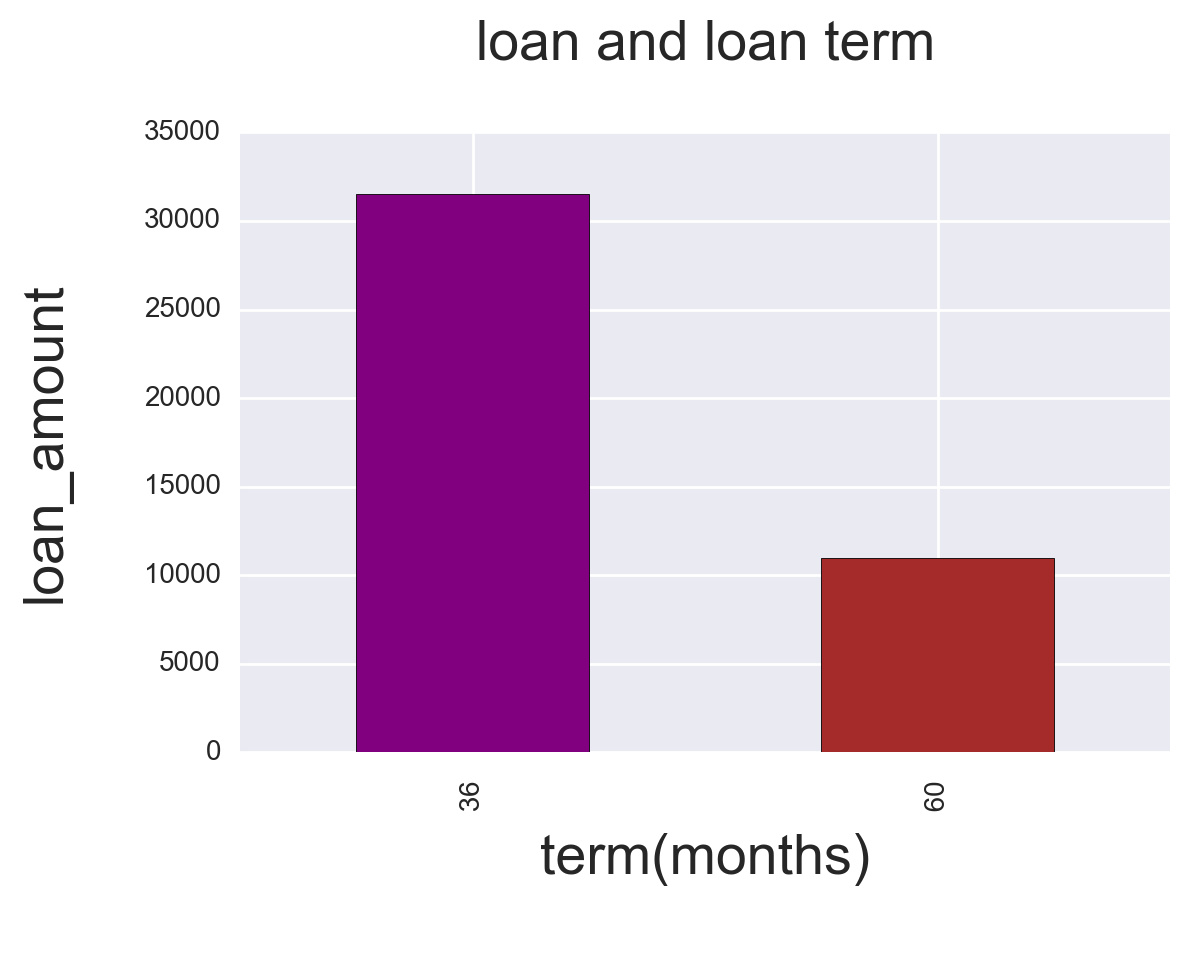

In [48]:
#Loan and Term
df2.groupby('term')['loan_amnt'].count().plot(kind="bar", color=['purple', 'brown'])
plt.title('loan and loan term\n', fontsize = 20)
plt.ylabel('loan_amount\n', fontsize=20)
plt.xlabel('term(months)\n', fontsize=20)
plt.show()


In [ ]:
#Lending Circle loans are mostly short-term loans 

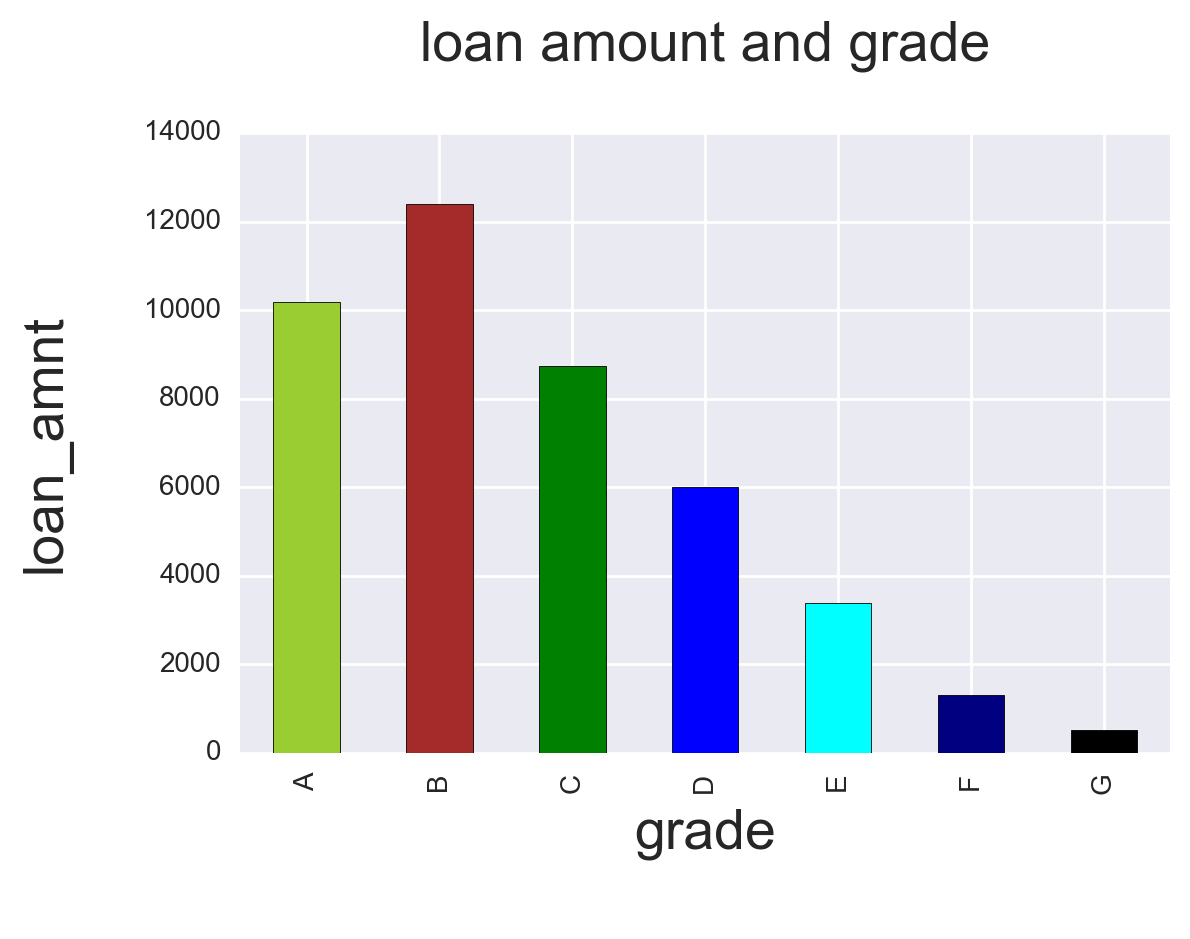

In [49]:
#Loan and Grade
df2.groupby('grade')['loan_amnt'].count().plot(kind="bar", colors=['yellowgreen', 'brown','green','blue','cyan','navy','black'])
plt.title('loan amount and grade\n', fontsize = 20)
plt.ylabel('loan_amnt\n', fontsize=20)
plt.xlabel('grade\n', fontsize=20)
plt.show()

In [ ]:
#A visualization of this chart suggests that the amount of loan is approved based on the credit score (grade)
#The higher your grade, the higher your loan

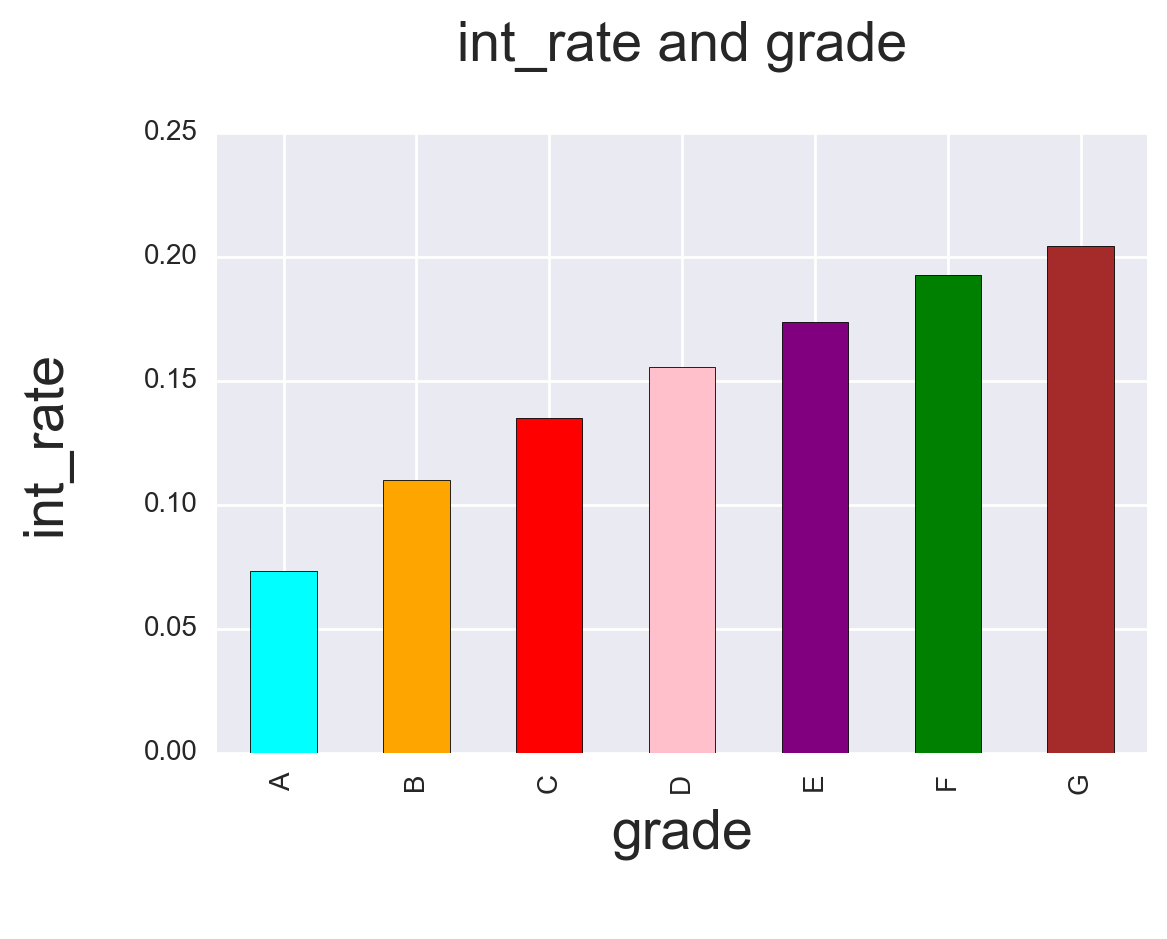

In [46]:
#Interest rate by grade

df2.groupby('grade')['int_rate'].mean().plot(kind="bar", colors=['cyan', 'orange','red','pink','purple','green','brown'])
plt.title('int_rate and grade\n', fontsize = 20)
plt.ylabel('int_rate\n', fontsize=20)
plt.xlabel('grade\n', fontsize=20)
plt.show()

In [ ]:
#Similarly, it appears that the interest rate is also based on the credit score
#The higher your grade, the lower your interest rate

# Main Findings

In [ ]:
# I am using publicly available Lending Circle loan data 

#After cleaning the data and extracting the data essential to my analysis, I have performed an exploratory data analysis that has 
#revealed the following:

    # The income range is between $1896 and $6,000,000 and the scatterplot indicates outliers. 
      #Since the income stated on the application form is randomly verified, it may be the case
        ##that the income has been overstated in some cases. On the other hand, the possibility that
        ##a successful small business reports such income cannot be excluded. We will deal with those
        ##outliers in the next steps of our analysis. 
        
    #The great majority of loans are fully paid and a very small number of loans payment are past due
    
    #Small businesses, finance, and home loans represent the most common categories of loans issued and have yielded more interests
    
    #Loans that have been delinquent for the past two years were requested for medical reasons, a wedding, and for a small business

    #Lending Circle loans are mostly short-term loans (36 months)
    
    #The amount of loan approved is positively correlated with the credit score (grade):the higher your grade, the higher your loan 
    
    #The interest rate is negatively correlated with the credit score (grade):the higher your grade, the lower the interest rate

# 4. DATA ANALYSIS

# Motivation & Project objectives 

In [ ]:
#Analyze to what extent loan defaults affect the Lending Circle investors (% of loan default)
#Determine the top 3 features to grant a loan
#Fit a model to predict loan default and run an algorithm to predict the 50 most risky loans (delinquency status)


# Methodology

#Train a model using the training data => use this model to classify/predict future loan applications 
#Test the model using the unseen test data to assess the model accuracy 

# Dealing with Outliers

# BALANCED NATURE OF THE DATASET

In [602]:
#let's analyze the status of granted loans
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', '',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [4]:
#Create a category for "good loans", "bad loans", and "past-due"
def loan(l):
   
    if'Fully Paid' in l or 'Does not meet the credit policy. Status:Fully Paid' in l:
        return 'good_loans'
    
    elif  'Charged Off' in l or 'Does not meet the credit policy. Status:Charged Off'  in l:
        return 'bad_loans'
    
    elif 'Late (31-120 days)' in l:
        return 'past_due'
    
     
df['loan_quality'] = df['loan_status'].apply(loan) 

In [5]:
df.loan_quality.value_counts()

good_loans    36103
bad_loans      6431
past_due          1
Name: loan_quality, dtype: int64

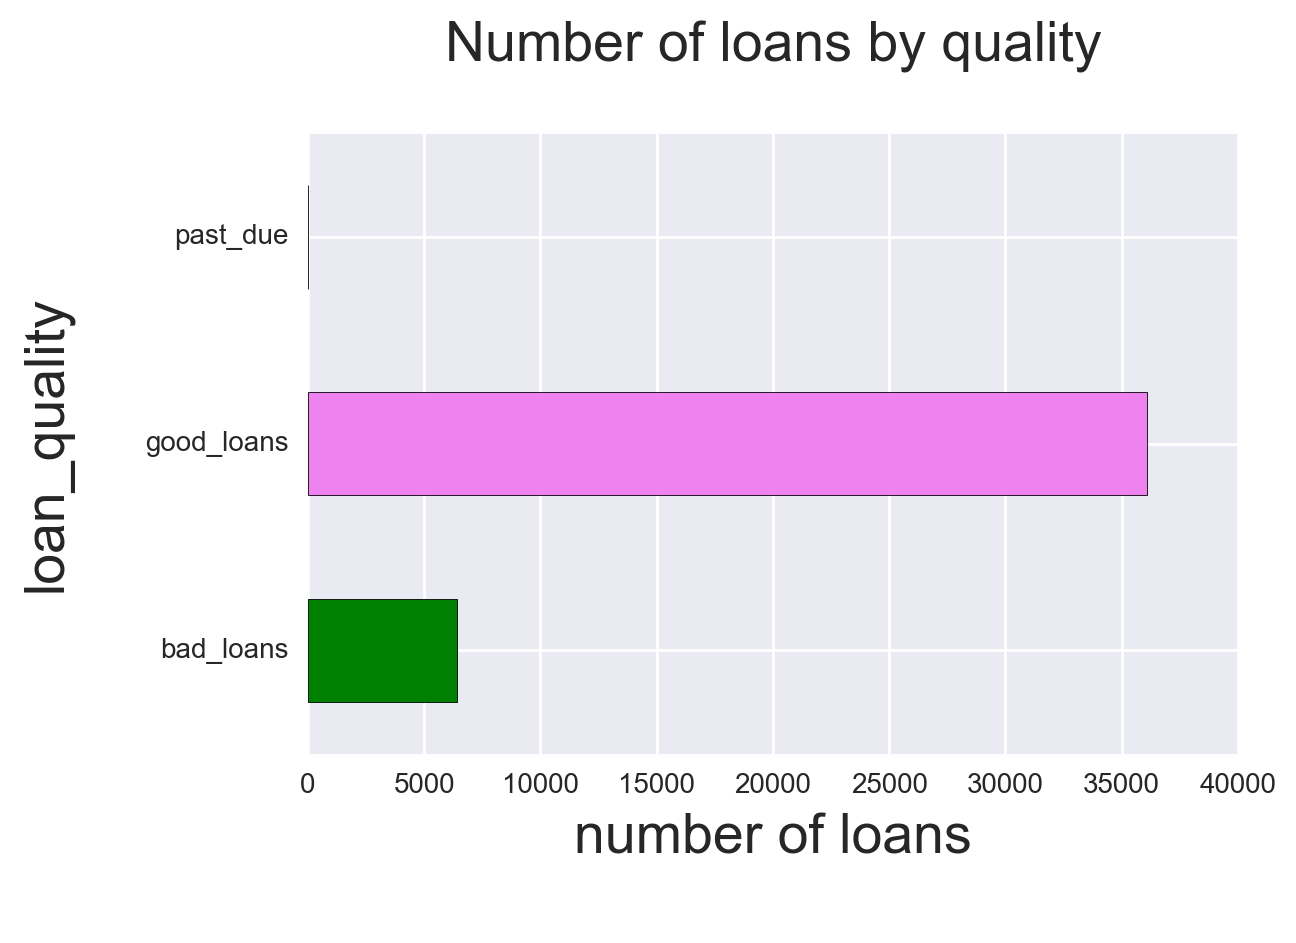

In [605]:
#Graph of loan by status
df.groupby('loan_quality')['id'].count().plot(kind='barh', color=['green', 'violet','blue','limegreen'])
plt.title('Number of loans by quality\n', fontsize = 20)
plt.ylabel('loan_quality\n', fontsize=20)
plt.xlabel('number of loans\n', fontsize=20)
plt.show()

In [9]:
#We need to address the unbalanced nature of the dataset

    #Three methods can be used: undersampling,  oversampling, or a synthetic data generation method.
#Undersampling: getting rid of 'good' loans until the number of 'good' and 'bad' loans are equal
#Oversampling:  taking a subset of the majority class
#Synthetic data generation: creating synthetic minority class ('bad loans) until we have as many instances as the majority class 'good loans'
    
#We choose to use a Synthetic data generation method (SMOTEEN) to balance the dataset
   
#Readings:
    #https://www.jair.org/media/953/live-953-2037-jair.pdf
    #https://media.readthedocs.org/pdf/pandas-ml/latest/pandas-ml.pdf

# IMPLEMENTING SMOTEEN

# METHOD 1

In [ ]:
#We first need to split the data between train and test data


In [5]:
#Create binary variables
def binary_emp(x):
    if x == '10 years':
        return 1
    if x == '1 year':
        return 3
    else:
        return 2
    
df['had_a_job'] = df.emp_length.map(binary_emp)

def binary_inc(x):
    if x <=1896<40000:
        return 1
    if x <=40000<59000:
        return 2
    if x <=59000<82500:
        return 3
    if x>=82500:
        return 4
   
    
df['had_an_income'] = df.annual_inc.map(binary_inc)

def binary_grade(x):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4
    if x == 'E':
        return 5
    if x == 'F':
        return 6
    
df['had_a_good_score'] = df.grade.map(binary_grade)

def binary_loan_quality(x):
    if x == 'good_loans':
        return 1
    else:
        return 0
    
df['had_a_good_loan'] = df.loan_quality.map(binary_loan_quality)

def binary_home_ownership(x):
    if x == 'RENT':
        return 0
    else:
        return 1
    
df['status_home_ownership'] = df.home_ownership.map(binary_home_ownership)

def binary_verification_status(x):
    if x == 'Verified':
        return 0
    else:
        return 1
    
df['status_verification'] = df.verification_status.map(binary_verification_status)

df['had_a_good_score'] = np.nan_to_num(df['had_a_good_score']).astype(int)

df['annual_inc'] = np.nan_to_num(df['annual_inc']).astype(int)

In [6]:
# Define target and predictors

X = df[['status_home_ownership', 'status_verification','had_a_job','had_a_good_score','annual_inc']]
y = df[['had_a_good_loan']]

In [7]:
# Split the data into train and test

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(29779, 5) (12763, 5)


(29779, 1) (12763, 1)


In [182]:
#As you can see, "good" loans (82%) heavily outnumber "bad" loans (18%)
df.loan_quality.value_counts()


good_loans    36103
bad_loans      6431
past_due          1
Name: loan_quality, dtype: int64

In [8]:
#Then we implement the algorithm below to balance the training dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN 
X_train, y_train = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=5, n_clusters_per_class=1, n_samples=6431, random_state=10)
print('Original dataset shape {}'.format(Counter(y_train)))
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

#http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/index.html

Original dataset shape Counter({1: 5787, 0: 644})
Resampled dataset shape Counter({0: 5787, 1: 5786})


# METHOD 2

In [109]:
#Create dummy variables for features
features = ['home_ownership','verification_status','loan_status']

loans_data = df[features ]

loans_data_dummies =pd.get_dummies(loans_data)

loans_data_dummies.iloc[0]

home_ownership_                                                    0.0
home_ownership_MORTGAGE                                            0.0
home_ownership_NONE                                                0.0
home_ownership_OTHER                                               0.0
home_ownership_OWN                                                 0.0
home_ownership_RENT                                                1.0
verification_status_                                               0.0
verification_status_Not Verified                                   0.0
verification_status_Source Verified                                0.0
verification_status_Verified                                       1.0
loan_status_                                                       0.0
loan_status_Charged Off                                            0.0
loan_status_Does not meet the credit policy. Status:Charged Off    0.0
loan_status_Does not meet the credit policy. Status:Fully Paid     0.0
loan_s

In [110]:
#Create test and train dataset

training_features, test_features, \
training_target, test_target, = train_test_split(loans_data_dummies.drop(['loan_status_Charged Off'], axis=1),
                                               loans_data_dummies['loan_status_Charged Off'],
                                               test_size = .1,
                                               random_state=12)

In [111]:
#Oversample only on training data
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)
from imblearn.combine import SMOTEENN 
sm = SMOTEENN(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [112]:
#By oversampling only on the training data,our results should be be generalizable.
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

print 'Validation Results'
print clf_rf.score(x_val, y_val)
print recall_score(y_val, clf_rf.predict(x_val))
print '\nTest Results'
print clf_rf.score(test_features, test_target)
print recall_score(test_target, clf_rf.predict(test_features))

#You can see below that the validation and test results are pretty close.
#https://beckernick.github.io/oversampling-modeling/

Validation Results
1.0
1.0

Test Results
0.999764982374
1.0


# VISUALIZING THE BALANCED TRAINING DATASET

 Here I am defining a function to print feature importance using best models


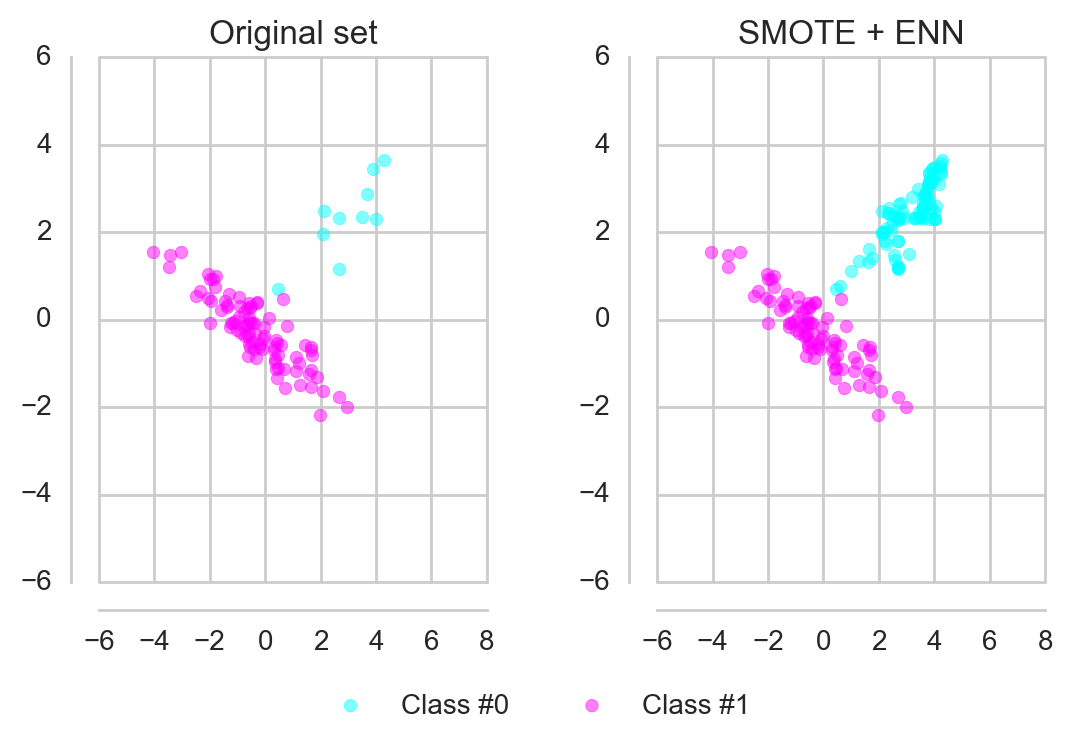

In [178]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTEENN

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5, color='aqua')
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5,color='magenta')
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5, color='aqua')
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5, color='magenta')
ax2.set_title('SMOTE + ENN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [ ]:
#http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py
#Christos Aridas & Guillaume Lemaitre

# ANALYTICAL MODEL

In [50]:
#We will implement a regression tree, a Random Forest and finally a Logistic Regression

# Regression Tree

In [ ]:
#Extract the most important features and sort them by value of importance

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

C:\Users\chris\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   25.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [11]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1}


best score 0.959194680178


In [12]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [13]:
feature_importance(X, dtr_best)

,feature,importance
2,had_a_job,0.815195
1,status_verification,0.152652
4,annual_inc,0.018689
3,had_a_good_score,0.013464
0,status_home_ownership,0.000000


In [ ]:
#Install packages
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [21]:
#Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.00, test data: 0.15
R^2 Regression tree train data: 0.99, test data: -0.18


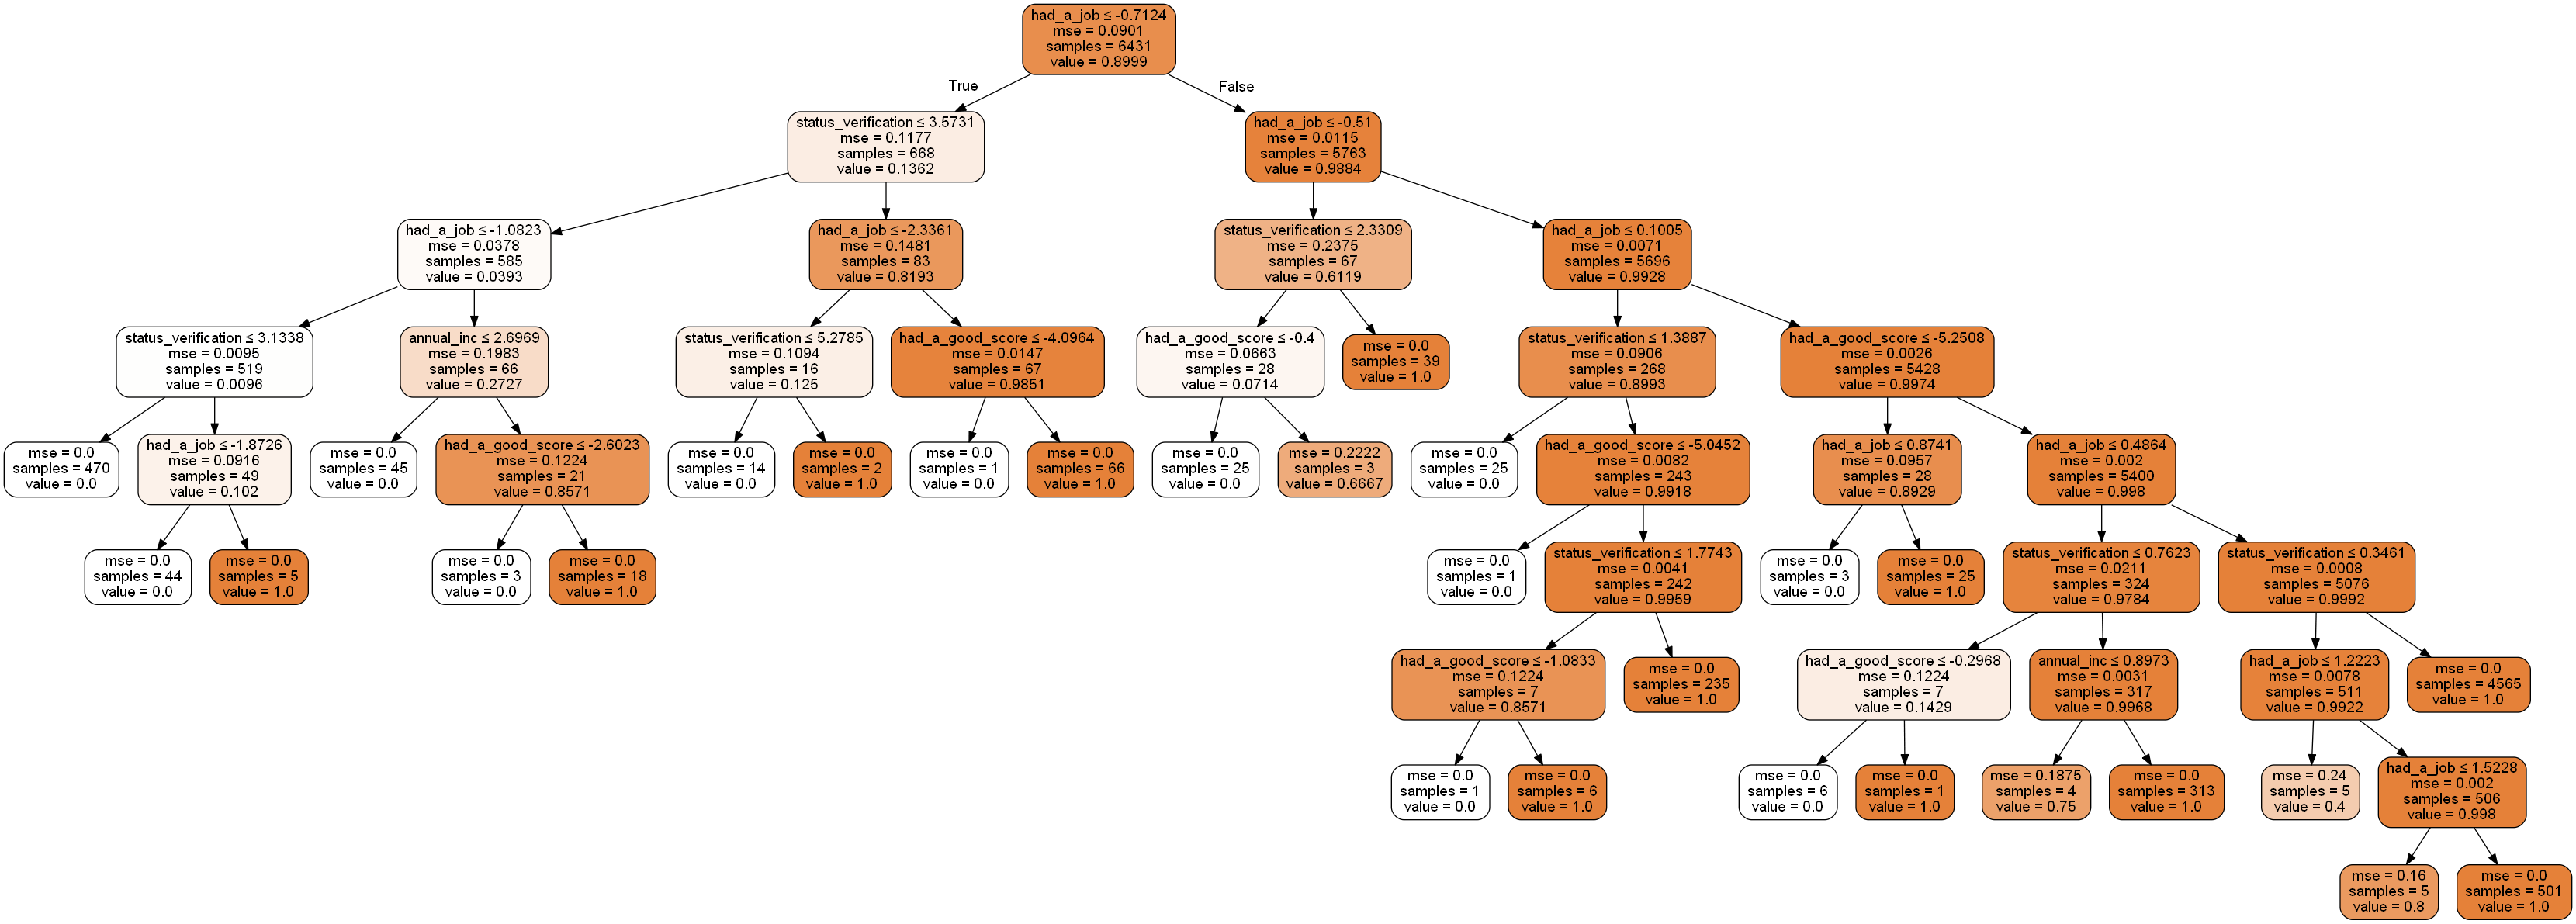

In [25]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest Regression Tree

In [26]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [27]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [28]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 4}


best score 0.915023666146


In [29]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
2,had_a_job,0.872888
1,status_verification,0.103778
4,annual_inc,0.020741
3,had_a_good_score,0.002535
0,status_home_ownership,0.000058


In [30]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 0.99572973,  0.99572973,  0.99572973, ...,  0.99572973,
        0.99572973,  0.99572973])

In [31]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.01, test data: 0.15
R^2 Random Forest Regression tree train data: 0.93, test data: -0.17


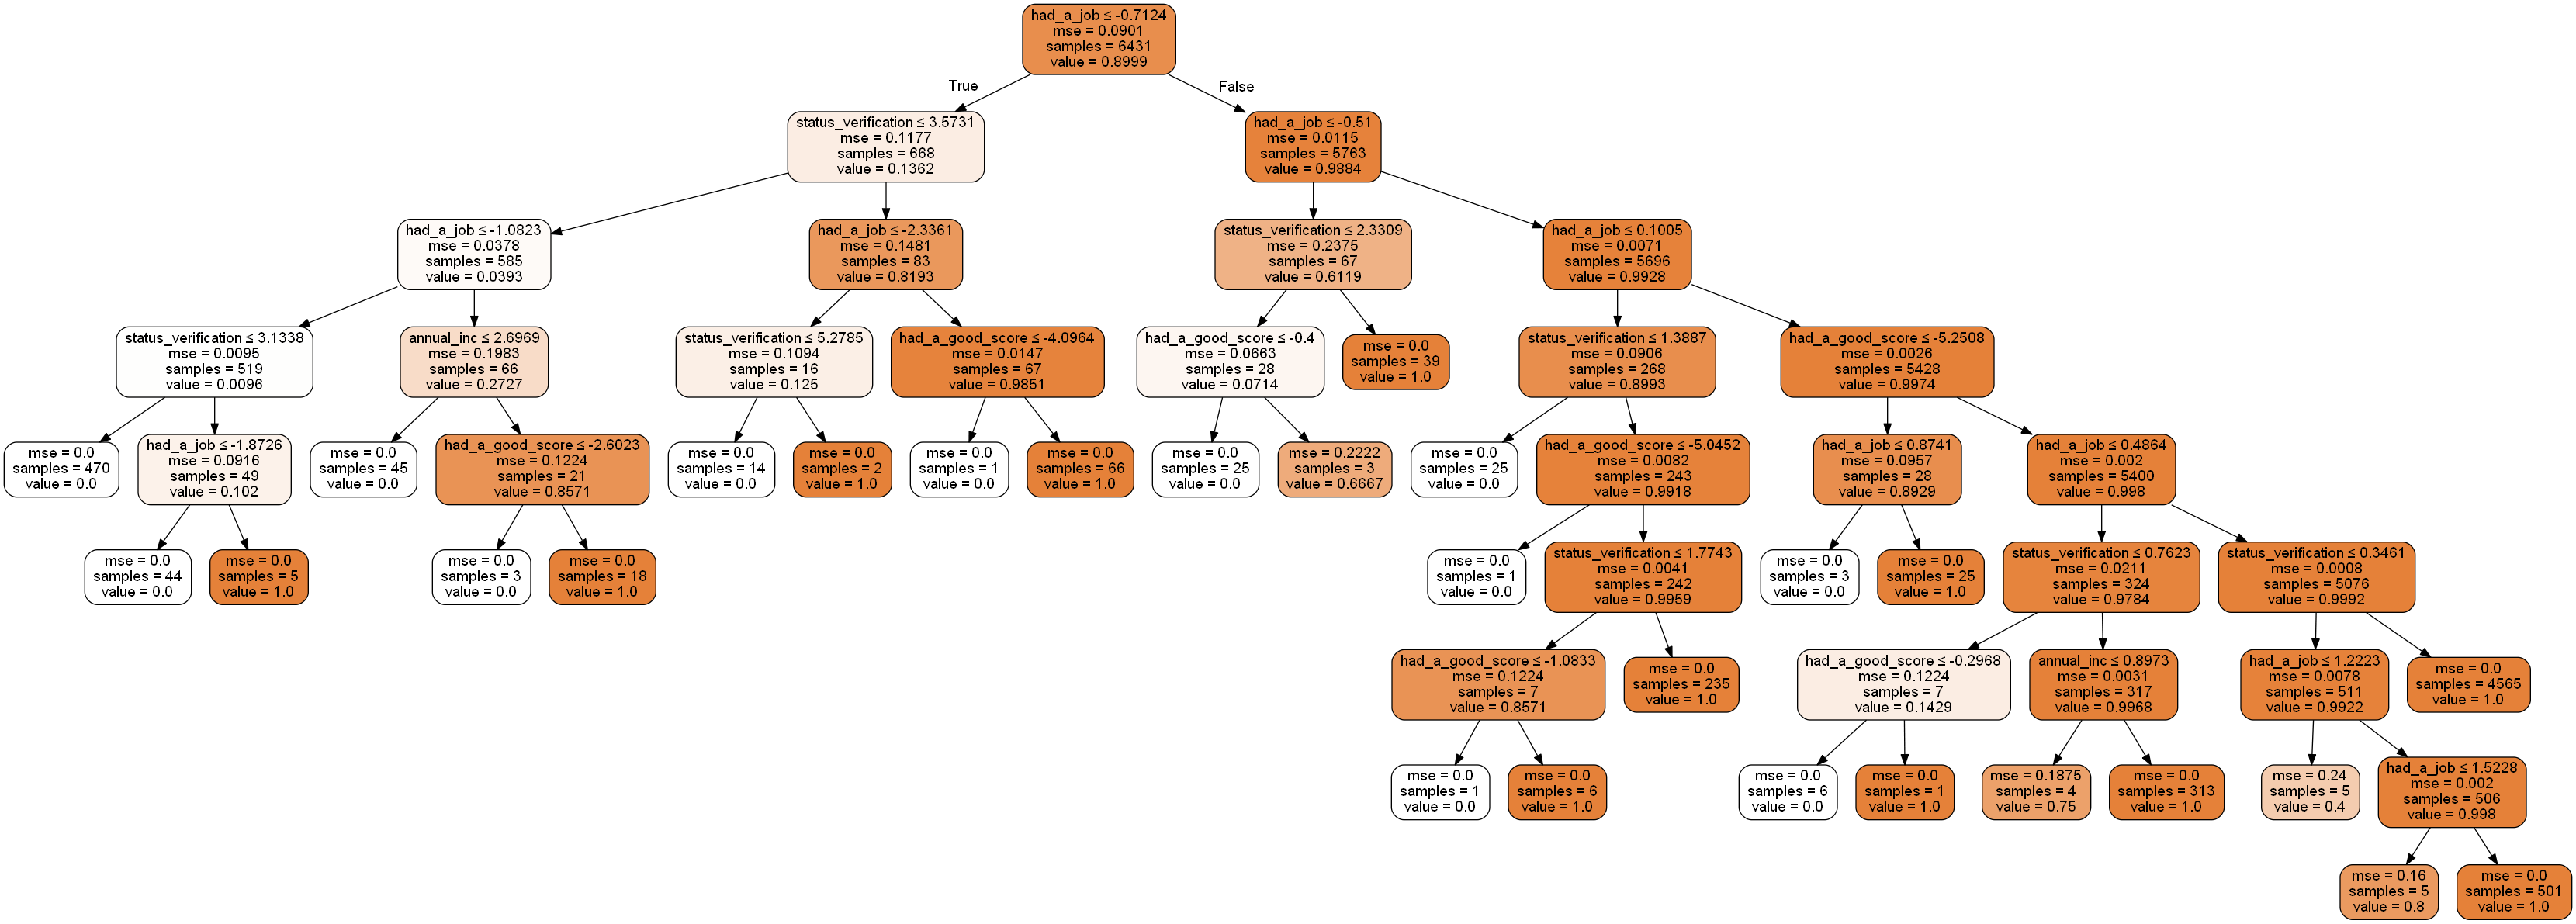

In [32]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Predictions

# Random Forest

In [ ]:
#Prediction

In [6]:
df5 = pd.read_stata('C:/Users/chris/Desktop/ECON-628-01-ckbamona/Datasets/lending/loan.dta')


In [7]:
df6 = df5[['term','grade','home_ownership','verification_status','loan_status']]

In [8]:
df6.dropna() 

,term,grade,home_ownership,verification_status,loan_status
0,36 months,B,RENT,Verified,Fully Paid
1,60 months,C,RENT,Source Verified,Charged Off
2,36 months,C,RENT,Not Verified,Fully Paid
3,36 months,C,RENT,Source Verified,Fully Paid
4,60 months,B,RENT,Source Verified,Fully Paid
5,36 months,A,RENT,Source Verified,Fully Paid
6,60 months,C,RENT,Not Verified,Fully Paid
7,36 months,E,RENT,Source Verified,Fully Paid
8,60 months,F,OWN,Source Verified,Charged Off
9,60 months,B,RENT,Verified,Charged Off


In [9]:
df_dummies =pd.get_dummies(df6)

In [10]:
df6.head(3)

,term,grade,home_ownership,verification_status,loan_status
0,36 months,B,RENT,Verified,Fully Paid
1,60 months,C,RENT,Source Verified,Charged Off
2,36 months,C,RENT,Not Verified,Fully Paid


In [11]:
df_dummies.head(3)

,term_,term_ 36 months,term_ 60 months,grade_,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,verification_status_,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_,loan_status_Charged Off,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_Late (31-120 days)
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

y = df_dummies['loan_status_Charged Off'].values
X = df_dummies.drop(['loan_status_Charged Off','loan_status_Does not meet the credit policy. Status:Charged Off','loan_status_','loan_status_Fully Paid','loan_status_Does not meet the credit policy. Status:Fully Paid','loan_status_Late (31-120 days)','verification_status_','grade_','term_'], axis=1).values

X_resampled, y_resampled = sm.fit_sample(X, y)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=0)

model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train, y_train)
predict = model.predict(X_test)

In [271]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      9235
        1.0       0.72      0.96      0.82       224

avg / total       0.99      0.99      0.99      9459



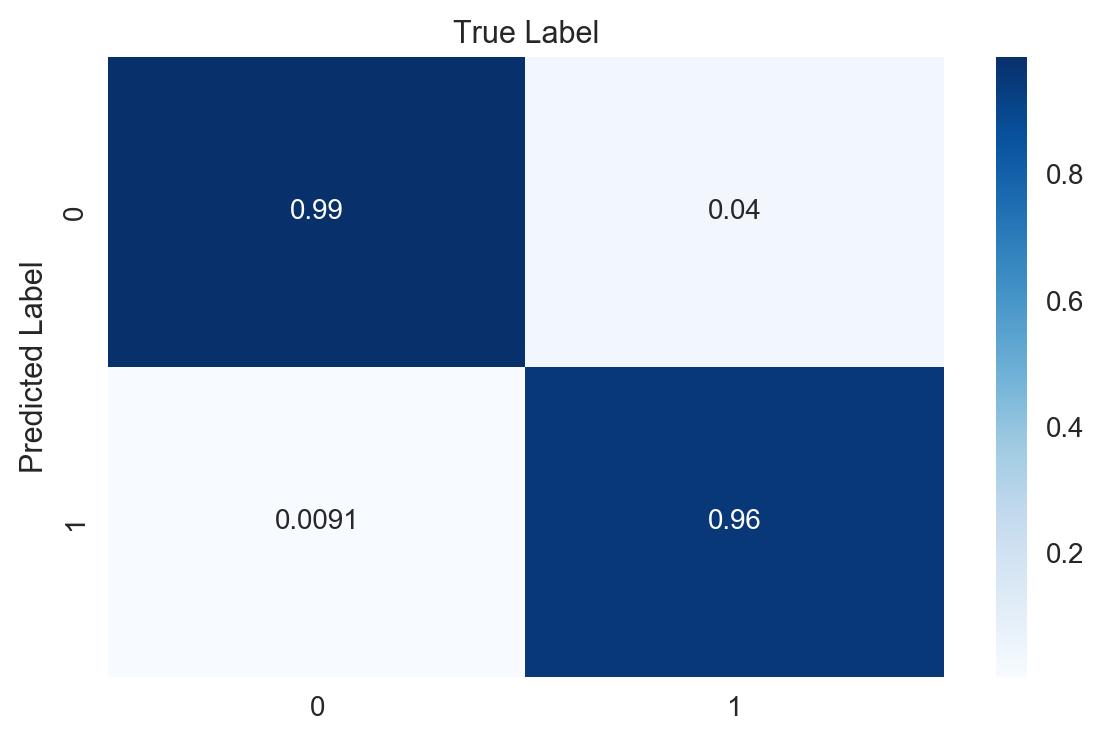

In [272]:
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

fig, ax = mp.subplots()
sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

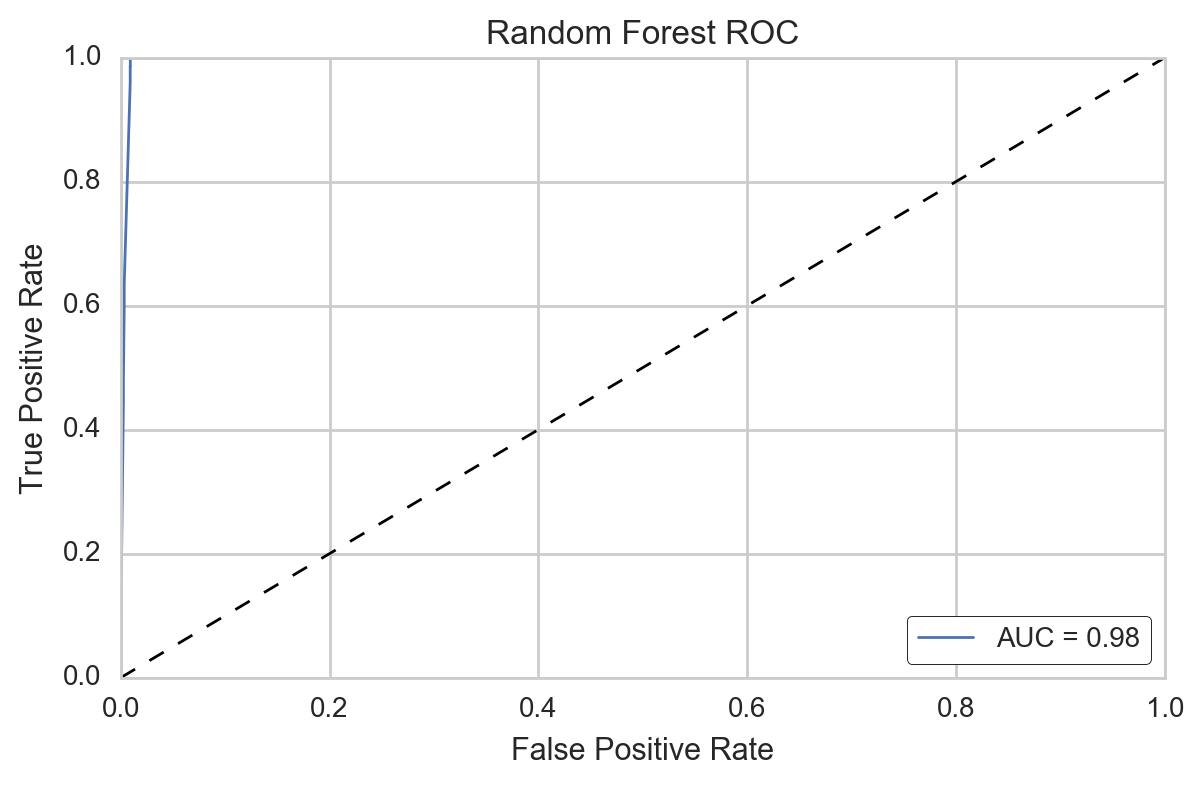

In [273]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, predict)

mp.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
mp.plot([0, 1], [0, 1], '--k', lw=1)
mp.xlabel('False Positive Rate')
mp.ylabel('True Positive Rate')
mp.title('Random Forest ROC')
mp.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

# Logit

In [ ]:
#Fit a Regression model and make predictions about the probability of a categorical event (good_loansor bad_loans)

In [21]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(42116L, 18L) (42116L,)
(426L, 18L) (426L,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=0)

In [26]:


from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=2, verbose=1, n_jobs=-1)

In [27]:
estimator.fit(X_train,y_train)

Fitting 2 folds for each of 320 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [28]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.867 



In [30]:
'''Baseline'''
'''Remember that 0 is bad loan 1 is good loan'''
print "If I randomly choose, %.0f percent of the time I will be choosing bad_loans" % ((np.mean(df_dummies['loan_status_Charged Off']))*100)

If I randomly choose, 13 percent of the time I will be choosing bad_loans


In [37]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

        0.0       0.86      1.00      0.92       366
        1.0       0.00      0.00      0.00        60

avg / total       0.74      0.86      0.79       426



C:\Users\chris\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
''' Code by Matt Hancock => thus far one of the best explanations of a Confusion Matrix
http://notmatthancock.github.io/2015/10/28/confusion-matrix.html'''

def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

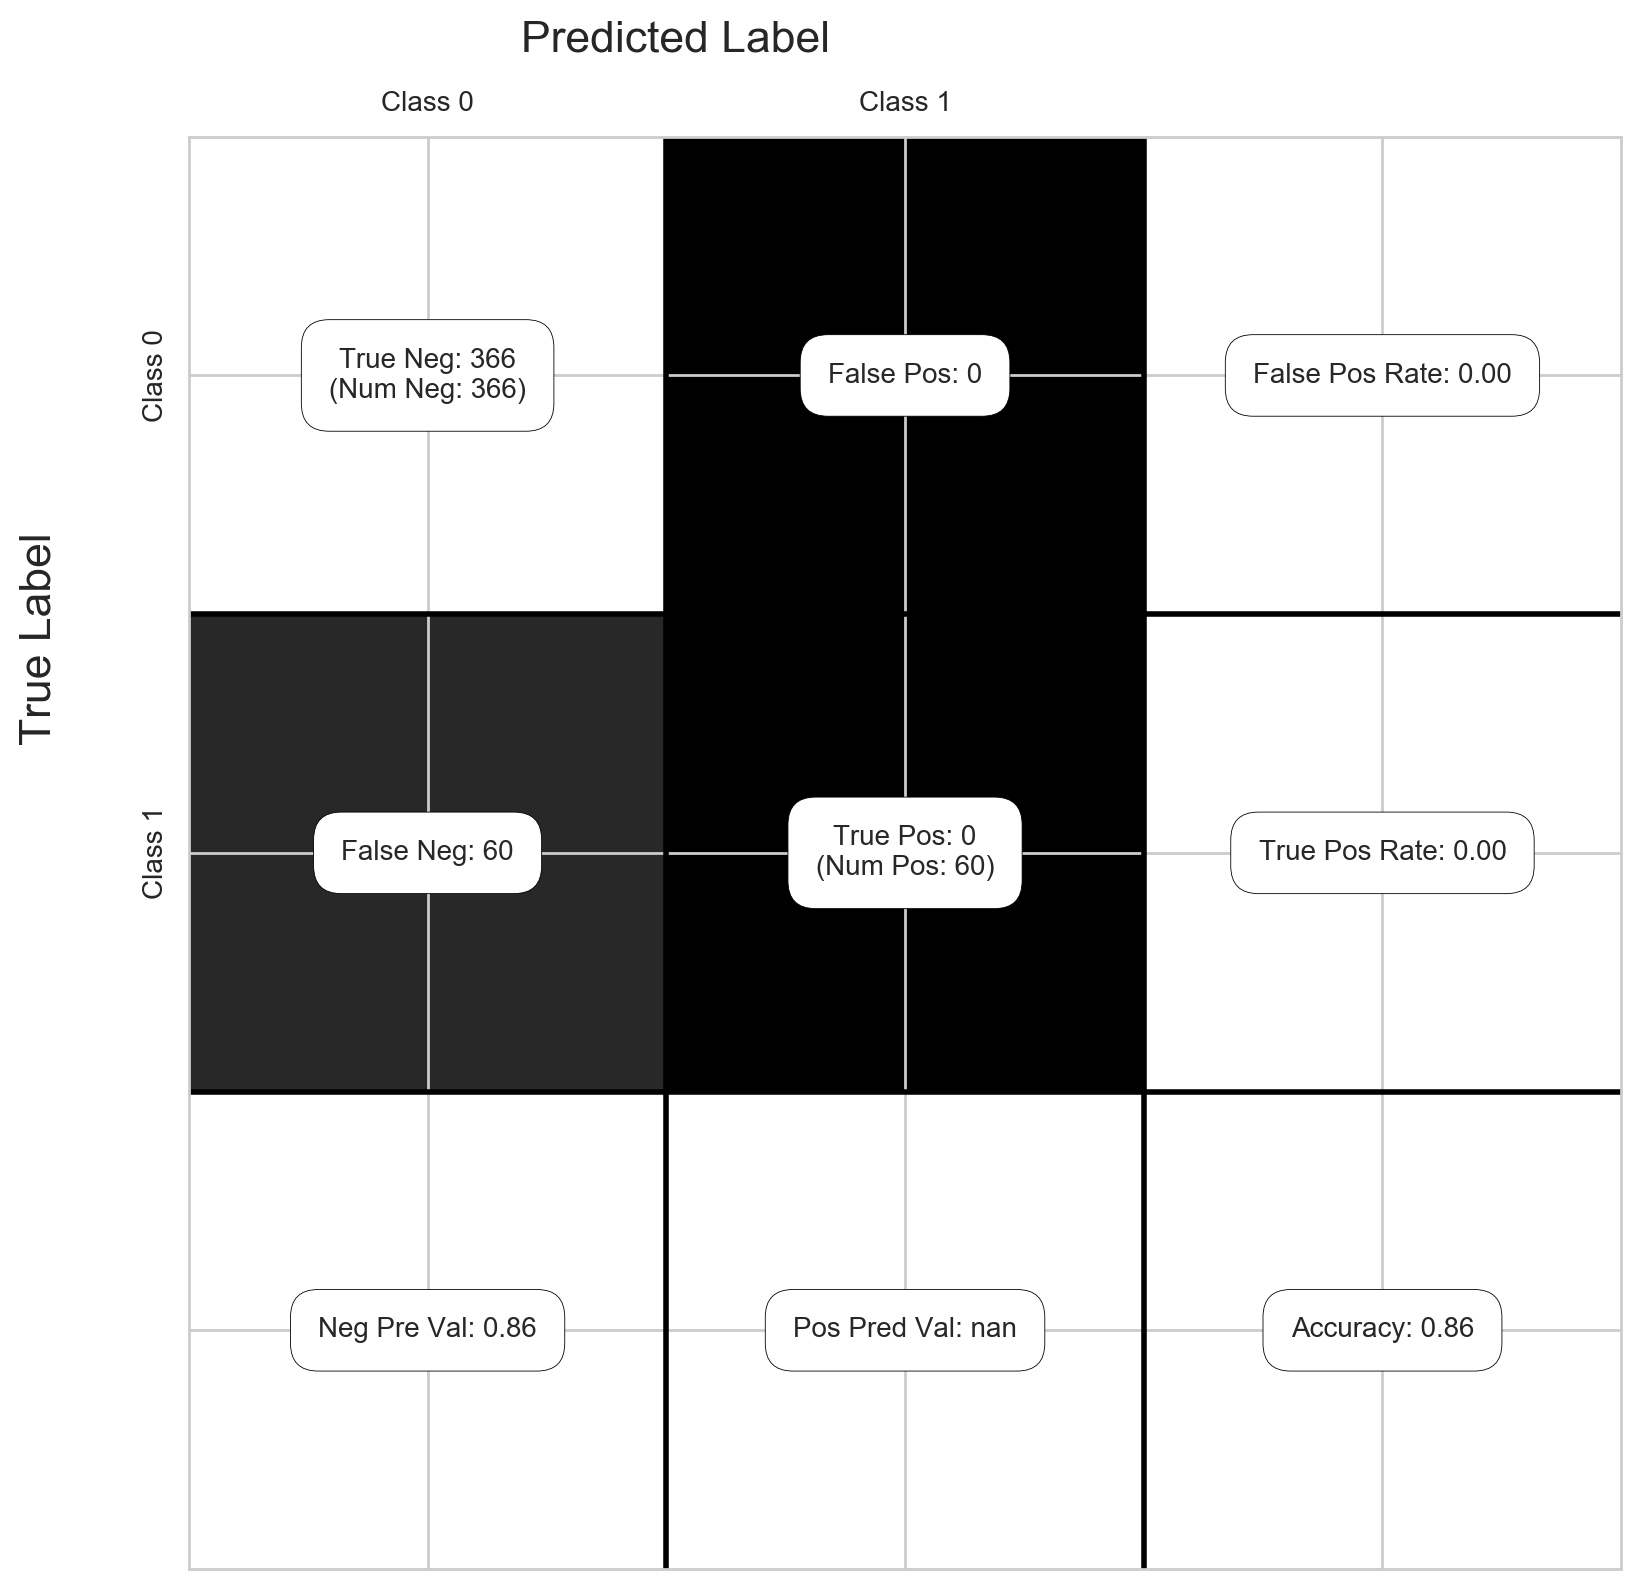

In [48]:
C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])

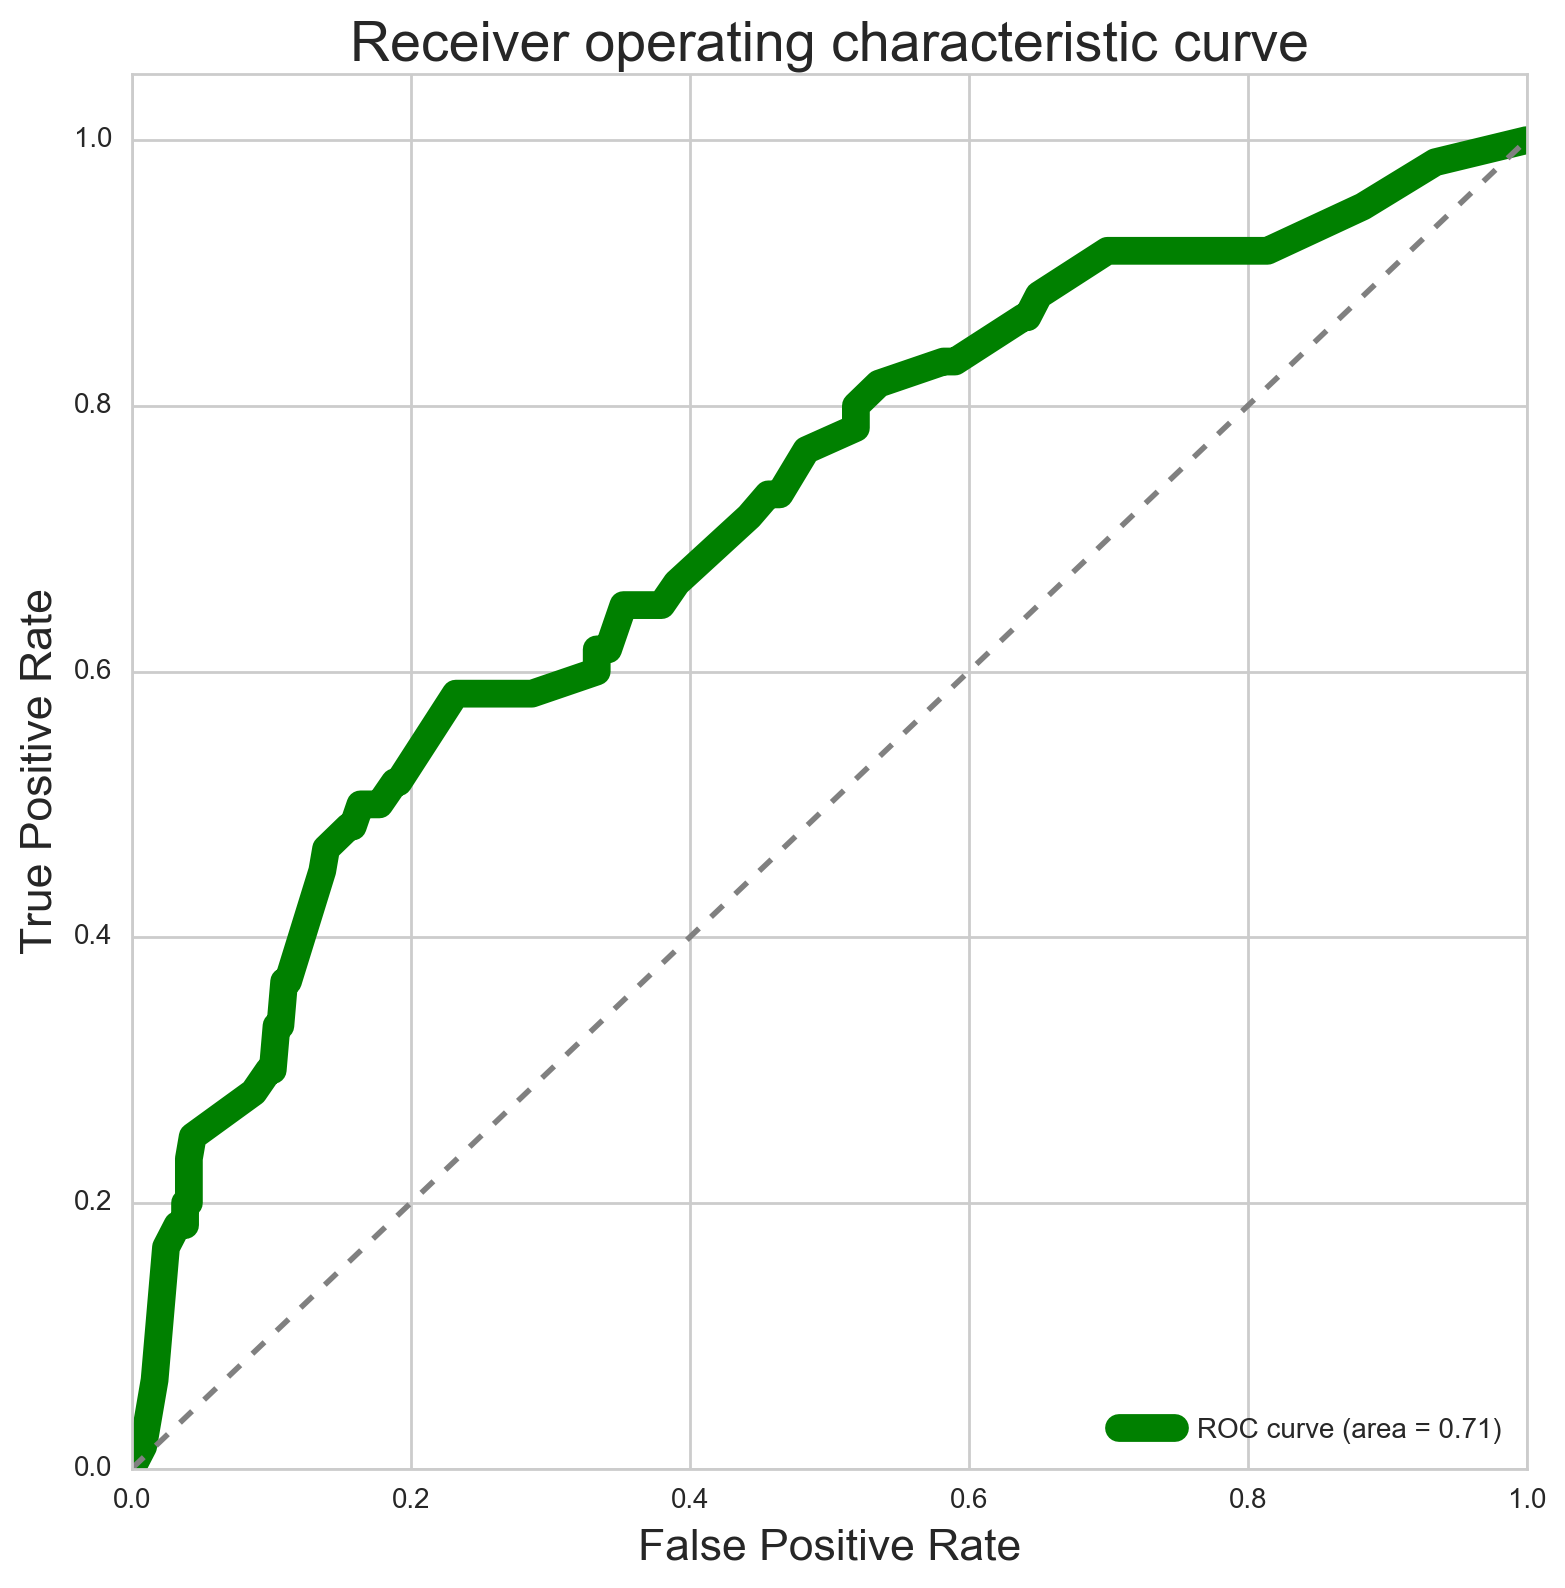

In [49]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Final Report

# Lending Club

# Goal of this Project

In [ ]:
#The goal of this project is to apply binary classification on loans granted on Lending Club. 
#"Good" loans are those that are already paid off, and "bad" loans are those on which the borrower default.

# I perform three types of analysis: 
#Analyze to what extent loan defaults affect the Lending Circle investors 
#Determine the top 5 features to grant a loan
#Fit a model to predict loan default


# Methodology

In [ ]:
 #I employ a Random Forest and a Logistic Regression to predict bad loans using Lending Club data. 

# Main Findings (Technical Report)

In [ ]:

#While both classifiers have fair performance on predicting bad loans,Random Forest is performs mush better than Logistic Regression 
#The random forest classifier gave us the best baseline algorithm by which we could identify loan defaulters with very good accuracy, precision, and recall. 
#The resulting ROC AUC was 0.98 for Random Forest vs 0.71 for Logistic Regression.



# Main Findings (Non-Technical Report)

In [ ]:
#Our analysis suggests that only 15% of loans granted on Lending Club were in "default" and charged off.

#Tthe most important factors an investor should consider in Peer-to-Peer Lending are the applicant's employment status, annual 
#income, and  credit score. Interestingly, we find that home ownership status does not play a major role
#in predicting loan default. 

#Investors should also know that:
       #Loans requested for medical reasons and to cover wedding costs are more likely to be delinquent.
       #Small business loans, finance loans, and home loans yielded more interest. 

    



# Concluding Remarks

In [ ]:
#Our analysis can be improved in many ways:

    #First of all, one could employ a different algorithm to balance the dataset (such as ADASYN or RandomOverSampler)


    #Then, one could perform a Gaussian Naive Bayes or a Gradient Boosting to see how these perform relative to the
    #Random Forest and Logistic Regression applied in this work.


    #Finally, it could be helpful to use a classification accuracy normalized by the imbalance of the classes in the data
    #(such as Kappa or Cohen’s kappa)
